# import libraries

In [1]:
import csv #to read csv file
import pandas as pd
from pandas import read_csv

import numpy as np
import urllib #to read online data
import datetime as dt #to process date format
import matplotlib.dates as mdates #to porcess date in mlt
from matplotlib import pyplot as plt
from matplotlib import style

import quandl #to do machinelearning
import sklearn

import operator #to sum two or more lists , item by item

# import data

## data is located at:

In [5]:
# C:\Users\alias\OneDrive for Business\Project\Detroit_Water_Aeration\second_data\aeration_one_sheet.csv

## reading dates

In [2]:
date=[]
temp=[]
with open(r'C:\Users\alias\OneDrive for Business\Project\Detroit_Water_Aeration\second_data\aeration_one_sheet.csv') as csvfile:
    rawdata = csv.reader(csvfile, delimiter=',')
    for line in rawdata:
        date.append(str(line[0]))
        temp.append(str(line[1]))
#date
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))
    #else:
        #date_dt.append(date[i])
len(date_dt)
#len(date)
temp_dt=[]

for i in range(len(date)):
    if i>=2 :
        if temp[i]=='':
            temp_dt.append(float(0.0))
        else:
            temp_dt.append(float(temp[i]))
    else:
        temp[i]=0.0
        #temp_dt.append(float(0.0))


## reading rest of data in a data-frame

In [3]:
df_all = read_csv(r'C:\Users\alias\OneDrive for Business\Project\Detroit_Water_Aeration\second_data\aeration_one_sheet.csv', sep=',')
#print (df_all)
len(df_all['ref_date'])
df = df_all.ix[1:]
#df['PEAS1']
df.replace('<7', '7')
df_modif = df.replace(['ND', '<0.02', '<3', '<4', '<5', '<7', '<10', '<17', '<20', '#DIV/0!'], ['', '0.02', '3', '4', '5', '7', '10', '17', '20', ''])
len(df_modif['Deck 1 Flow'])
df_modif

,ref_date,Influent Temp,Deck 1 Flow,Deck 2 Flow,Deck 3 Flow,Deck 4 Flow,PEAS1_BOD-3,PEAS1_COD,PEAS1_OG,PEAS1_TSS,...,O2 flow - 3,O2 flow - 4,Pressure - 1,Pressure - 2,Pressure - 3,Pressure - 4,Vent % - 1,Vent % - 2,Vent % - 3,Vent % - 4
1,8/1/2014,69.8,201,0.0,198.0,200.0,44,127,5,70,...,92.00,106.4,0.7,0.0,0.3,3.7,56.7,20.4,35.2,22.9
2,8/2/2014,69.4,216,0.0,220.0,216.0,61,163,6,71,...,92.30,102.7,0.6,0.0,0.5,5.2,55.7,20.5,37.6,21.6
3,8/3/2014,69.6,261,0.0,263.0,261.0,43,164,6,63,...,88.70,90.8,0.4,0.0,0.7,2.0,39.3,20.4,34.5,22.4
4,8/4/2014,69.2,196,0.0,226.0,194.0,51,113,8,80,...,96.80,98.4,1.3,0.0,0.6,0.5,49.3,20.3,36.4,21.0
5,8/5/2014,69.1,268,0.0,284.0,279.0,51,123,6,82,...,105.40,110.3,1.5,0.0,0.9,11.0,53.6,20.4,38.5,25.7
6,8/6/2014,69.3,260,0.0,264.0,270.0,49,133,12,65,...,89.10,95.7,1.3,0.0,0.6,11.0,51.8,20.3,32.4,25.4
7,8/7/2014,68.9,223,0.0,214.0,222.0,52,122,11,52,...,89.30,95.9,1.1,0.0,0.5,2.9,52.7,20.3,34.1,22.6
8,8/8/2014,69,200,0.0,212.0,197.0,48,158,5,55,...,90.30,117.8,1.4,0.0,0.5,1.9,56.0,20.3,37.7,26.8
9,8/9/2014,69.1,164,0.0,211.0,199.0,59,177,7,58,...,97.40,132.2,2.7,0.0,0.5,4.3,50.1,20.3,42.3,30.4
10,8/10/2014,69.4,22,0.0,278.0,269.0,,,,,...,126.50,154.6,0.2,0.0,0.9,3.7,19.9,20.2,39.4,30.8


# Column names in the data-frame

In [4]:
list(df_modif.columns.values)

['ref_date',
 'Influent Temp',
 'Deck 1 Flow',
 'Deck 2 Flow',
 'Deck 3 Flow',
 'Deck 4 Flow',
 'PEAS1_BOD-3',
 'PEAS1_COD',
 'PEAS1_OG',
 'PEAS1_TSS',
 'PEAS1_VSS',
 'PEAS3_BOD-3',
 'PEAS3_COD',
 'PEAS3_OG',
 'PEAS3_TSS',
 'PEAS3_VSS',
 'PEAS4_BOD-3',
 'PEAS4_COD',
 'PEAS4_OG',
 'PEAS4_TSS',
 'PEAS4_VSS',
 'Combined TP',
 'Secondary Eff Flow (inc. SFE + Buffer)',
 'C2E3_BOD-3',
 'C2E3_NH3',
 'C2E3_OG',
 'C2E3_SP',
 'C2E3_TP',
 'C2E3_TSS',
 'C2E3_TS',
 'C2E4_BOD-3',
 'C2E4_NH3',
 'C2E4_OG',
 'C2E4_SP',
 'C2E4_TP',
 'C2E4_TSS',
 'C2E4_TS',
 'Recycle',
 'Buffer',
 'RAS-1 Flow',
 'RAS-2 Flow',
 'RAS-3 Flow',
 'RAS-4 Flow',
 'RAS-1_TSS',
 'RAS-2_TSS',
 'RAS-3_TSS',
 'RAS-4_TSS',
 'MLSS-1',
 'MLSS-2',
 'MLSS-3',
 'MLSS-4',
 'MLVSS-1',
 'MLVSS-2',
 'MLVSS-3',
 'MLVSS-4',
 'SVI-1',
 'SVI-2',
 'SVI-3',
 'SVI-4',
 'WAS flow',
 'Deck 1 Temp',
 'Deck 2 Temp',
 'Deck 3 Temp',
 'Deck 4 Temp',
 'LBDO - 1',
 'LBDO - 2',
 'LBDO - 3',
 'LBDO - 4',
 'O2 flow - 1',
 'O2 flow - 2',
 'O2 flow - 3',
 'O2 fl

# changing string to float

In [5]:
for col_name in list(df_modif.columns.values):
    if col_name != 'ref_date':
        df_modif[col_name] = pd.to_numeric(df_modif[col_name] , errors='ignore')

# Filling the missing values

## replacing missing values with previous value

In [33]:
#adding 2 series
ali=[]
for col_name in list(df_modif.columns.values):
    if col_name == 'PEAS1_OG':
        #print(col_name)
        for i in range(len(df_modif[col_name])+1):
            #print(i)
            
            if i>= 1:
                if df_modif[col_name][i] != '':
                    ali.append(float(df_modif[col_name][i]))
                else:
                    if i== 1:
                        ali.append(float(0.0))
                    else:
                        ali.append(float(df_modif[col_name][(i-1)]))

#df_modif['PEAS1_BOD-3']  
ali
#len(date_dt)
#len(ali)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


[]

# ploting

In [6]:
##Ploting inside the notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (40, 24)

Populating the interactive namespace from numpy and matplotlib


## 1- input flow amount and charactristics

609
609


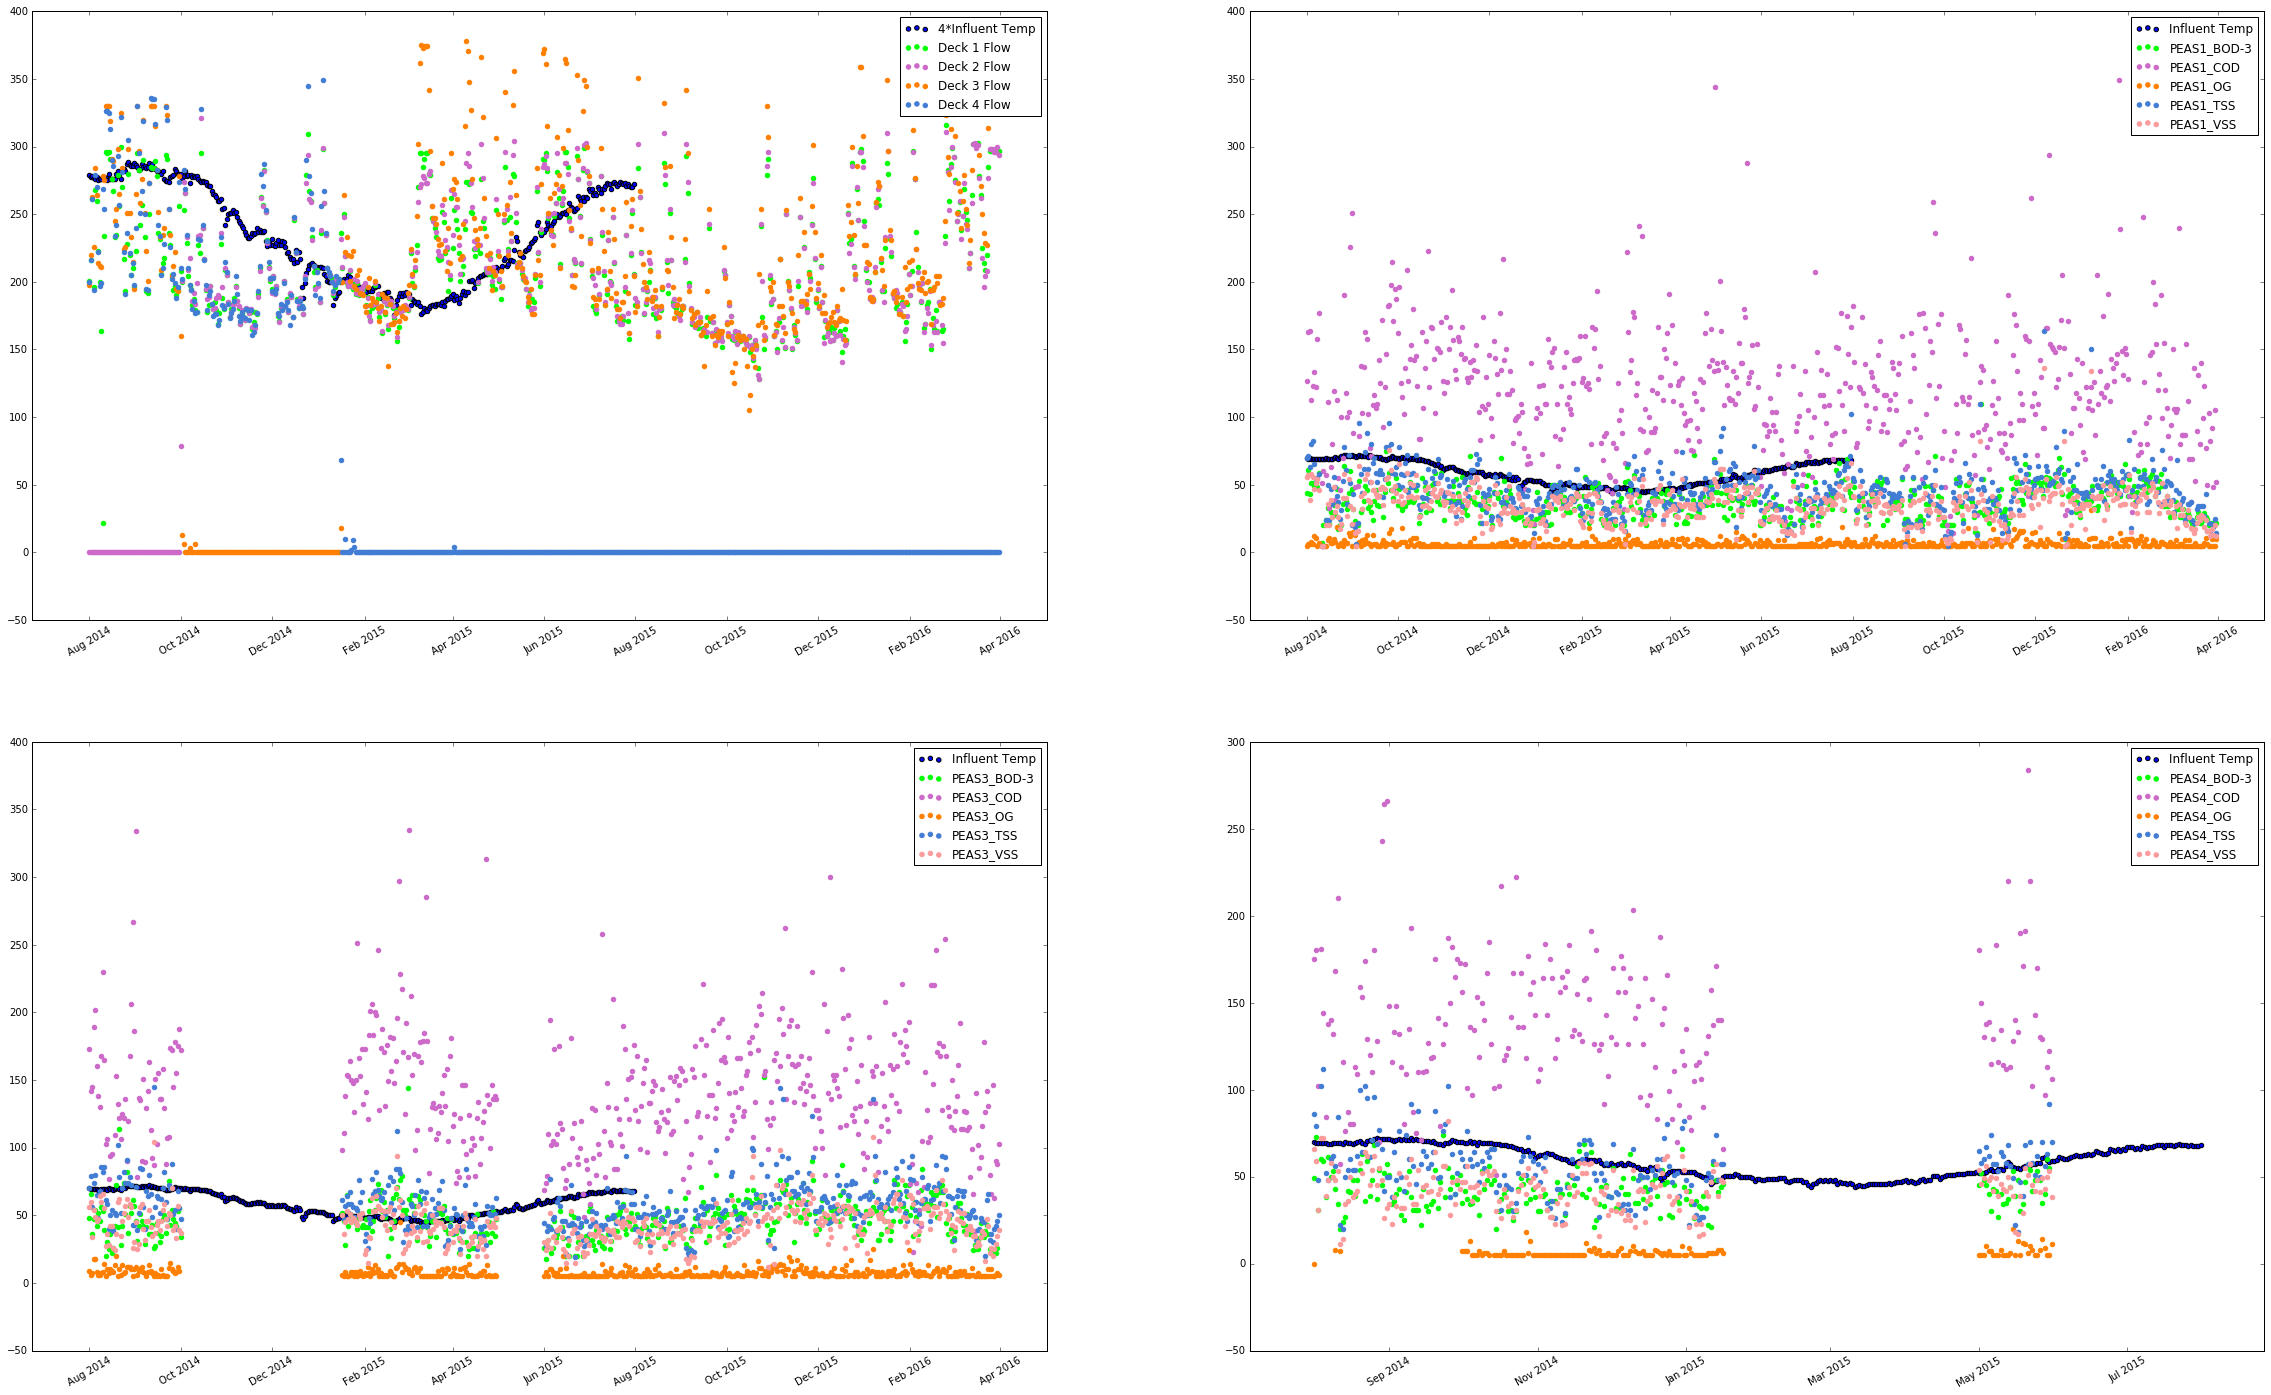

In [7]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))
    #else:
        #date_dt.append(date[i])
print (len(date_dt))
print (len(temp_dt))
#plt.plot_date(date_dt, 0)
value=[]
for i in range(len(date_dt)):
    value.append(i)

fig=plt.figure()
ax1=plt.subplot2grid((2,2),(0,0))
ax2=plt.subplot2grid((2,2),(0,1))
ax3=plt.subplot2grid((2,2),(1,0))
ax4=plt.subplot2grid((2,2),(1,1))
ax1.scatter(date_dt, 4*df_modif['Influent Temp'], label='4*Influent Temp')
ax1.scatter(date_dt, df_modif['Deck 1 Flow'], label='Deck 1 Flow', color='#00ff00')
ax1.scatter(date_dt, df_modif['Deck 2 Flow'], label='Deck 2 Flow', color='#cd69c9')
ax1.scatter(date_dt, df_modif['Deck 3 Flow'], label='Deck 3 Flow', color='#ff8000')
ax1.scatter(date_dt, df_modif['Deck 4 Flow'], label='Deck 4 Flow', color='#417dd4')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(30)
ax1.legend()
ax2.scatter(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax2.scatter(date_dt, df_modif['PEAS1_BOD-3'], label='PEAS1_BOD-3', color='#00ff00')
ax2.scatter(date_dt, df_modif['PEAS1_COD'], label='PEAS1_COD', color='#cd69c9')
ax2.scatter(date_dt, df_modif['PEAS1_OG'], label='PEAS1_OG', color='#ff8000')
ax2.scatter(date_dt, df_modif['PEAS1_TSS'], label='PEAS1_TSS', color='#417dd4')
ax2.scatter(date_dt, df_modif['PEAS1_VSS'], label='PEAS1_VSS', color='#fb9b9c')
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(30)
ax2.legend()
ax3.scatter(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax3.scatter(date_dt, df_modif['PEAS3_BOD-3'], label='PEAS3_BOD-3', color='#00ff00')
ax3.scatter(date_dt, df_modif['PEAS3_COD'], label='PEAS3_COD', color='#cd69c9')
ax3.scatter(date_dt, df_modif['PEAS3_OG'], label='PEAS3_OG', color='#ff8000')
ax3.scatter(date_dt, df_modif['PEAS3_TSS'], label='PEAS3_TSS', color='#417dd4')
ax3.scatter(date_dt, df_modif['PEAS3_VSS'], label='PEAS3_VSS', color='#fb9b9c')
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(30)
ax3.legend()
ax4.scatter(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax4.scatter(date_dt, df_modif['PEAS4_BOD-3'], label='PEAS4_BOD-3', color='#00ff00')
ax4.scatter(date_dt, df_modif['PEAS4_COD'], label='PEAS4_COD', color='#cd69c9')
ax4.scatter(date_dt, df_modif['PEAS4_OG'], label='PEAS4_OG', color='#ff8000')
ax4.scatter(date_dt, df_modif['PEAS4_TSS'], label='PEAS4_TSS', color='#417dd4')
ax4.scatter(date_dt, df_modif['PEAS4_VSS'], label='PEAS4_VSS', color='#fb9b9c')
for label in ax4.xaxis.get_ticklabels():
    label.set_rotation(30)
ax4.legend()
#ax1.title('scatter\nplot')
#ax1.xlabel('time')
#ax1.ylabel('y')
plt.legend()
plt.show()

## 2- input characteristics  comparison

609
609


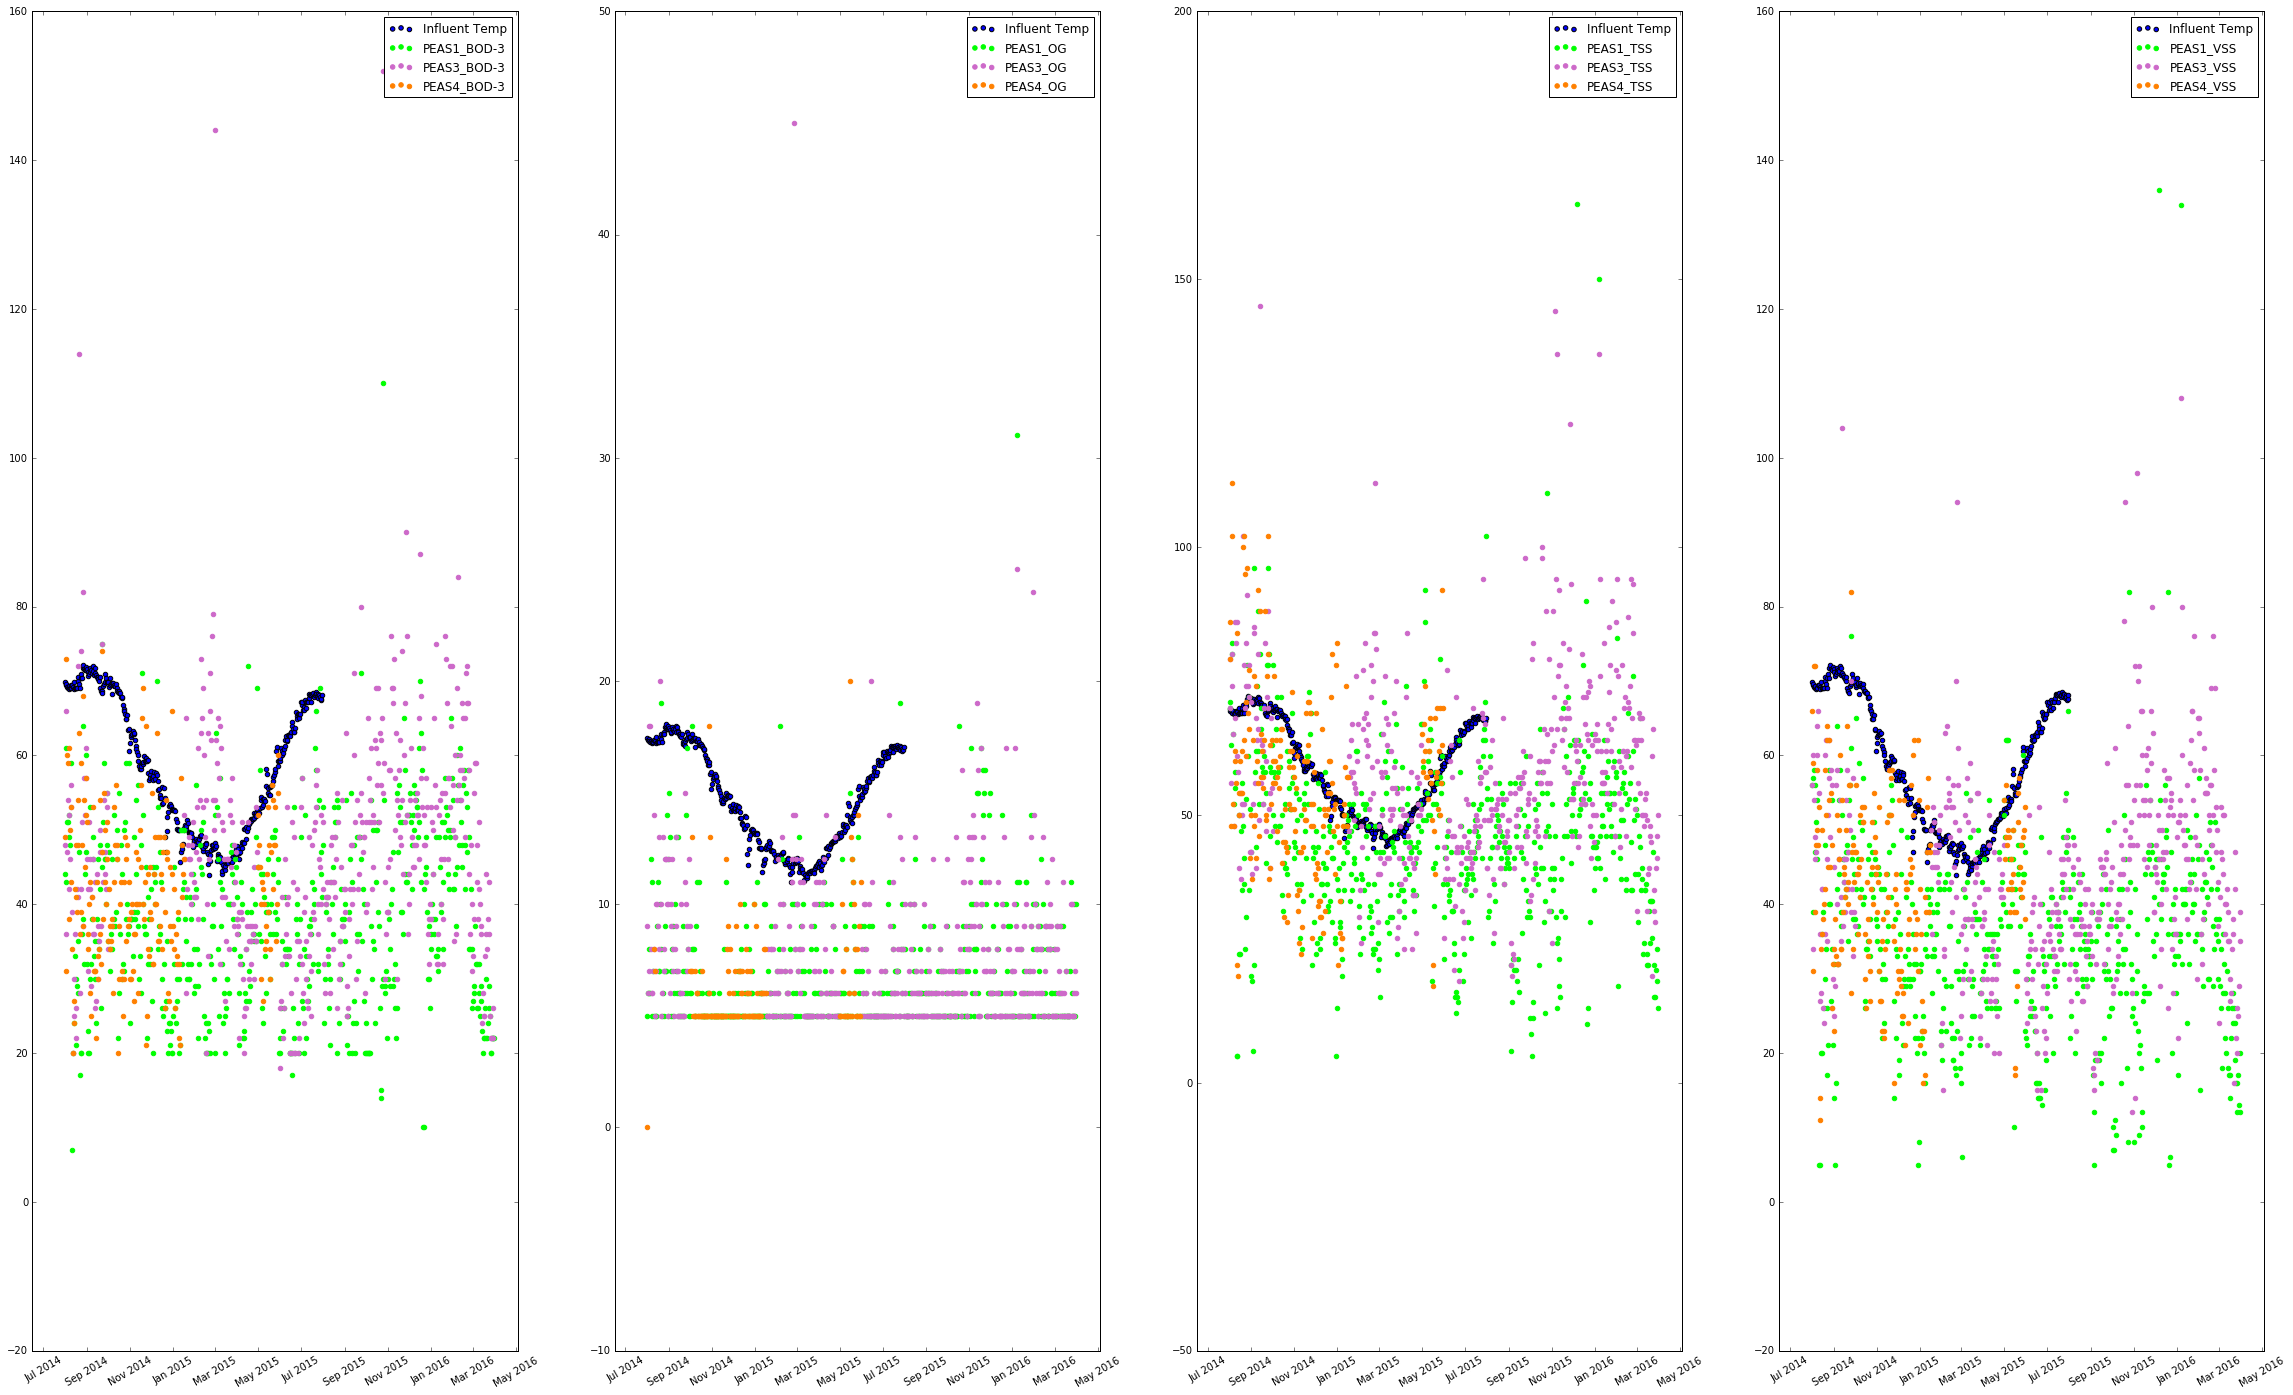

In [8]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))
    #else:
        #date_dt.append(date[i])
print (len(date_dt))
print (len(temp_dt))
#plt.plot_date(date_dt, 0)
value=[]
for i in range(len(date_dt)):
    value.append(i)
fig=plt.figure()
ax1=plt.subplot2grid((1, 4),(0,0))
ax2=plt.subplot2grid((1, 4),(0,1))
ax3=plt.subplot2grid((1, 4),(0,2))
ax4=plt.subplot2grid((1, 4),(0,3))
ax1.scatter(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax1.scatter(date_dt, df_modif['PEAS1_BOD-3'], label='PEAS1_BOD-3', color='#00ff00')
ax1.scatter(date_dt, df_modif['PEAS3_BOD-3'], label='PEAS3_BOD-3', color='#cd69c9')
ax1.scatter(date_dt, df_modif['PEAS4_BOD-3'], label='PEAS4_BOD-3', color='#ff8000')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(30)
ax1.legend()
ax2.scatter(date_dt, .25*df_modif['Influent Temp'], label='Influent Temp')
ax2.scatter(date_dt, df_modif['PEAS1_OG'], label='PEAS1_OG', color='#00ff00')
ax2.scatter(date_dt, df_modif['PEAS3_OG'], label='PEAS3_OG', color='#cd69c9')
ax2.scatter(date_dt, df_modif['PEAS4_OG'], label='PEAS4_OG', color='#ff8000')
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(30)
ax2.legend()
ax3.scatter(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax3.scatter(date_dt, df_modif['PEAS1_TSS'], label='PEAS1_TSS', color='#00ff00')
ax3.scatter(date_dt, df_modif['PEAS3_TSS'], label='PEAS3_TSS', color='#cd69c9')
ax3.scatter(date_dt, df_modif['PEAS4_TSS'], label='PEAS4_TSS', color='#ff8000')
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(30)
ax3.legend()
ax4.scatter(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax4.scatter(date_dt, df_modif['PEAS1_VSS'], label='PEAS1_VSS', color='#00ff00')
ax4.scatter(date_dt, df_modif['PEAS3_VSS'], label='PEAS3_VSS', color='#cd69c9')
ax4.scatter(date_dt, df_modif['PEAS4_VSS'], label='PEAS4_VSS', color='#ff8000')
for label in ax4.xaxis.get_ticklabels():
    label.set_rotation(30)
ax4.legend()
#ax1.title('scatter\nplot')
#ax1.xlabel('time')
#ax1.ylabel('y')
plt.legend()
plt.show()

## 3- total influent plutants

In [8]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))
    #else:
        #date_dt.append(date[i])
print (len(date_dt))
print (len(temp_dt))
#plt.plot_date(date_dt, 0)
value=[]
for i in range(len(date_dt)):
    value.append(i)
fig=plt.figure()
ax1=plt.subplot2grid((1, 1),(0,0))
ax1.scatter(date_dt, 10*df_modif['Influent Temp'], label='10*Influent Temp')
ax1.scatter(date_dt, 500*df_modif['Combined TP'], label='500*Combined TP', color='#00ff00')
ax1.scatter(date_dt, df_modif['Secondary Eff Flow (inc. SFE + Buffer)'], label='Secondary Eff Flow (inc. SFE + Buffer)', color='#cd69c9')
ax1.scatter(date_dt, map(operator.add, map(operator.add, df_modif['Deck 1 Flow'],  df_modif['Deck 2 Flow']),map(operator.add, df_modif['Deck 3 Flow'],  df_modif['Deck 4 Flow'])), label='Deck 1+2+3+4 Flow', color='#ff8000')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(30)
ax1.legend()
#ax1.title('scatter\nplot')
#ax1.xlabel('time')
#ax1.ylabel('y')
plt.legend()
plt.show()

609
609


## 4- process specification vs. time

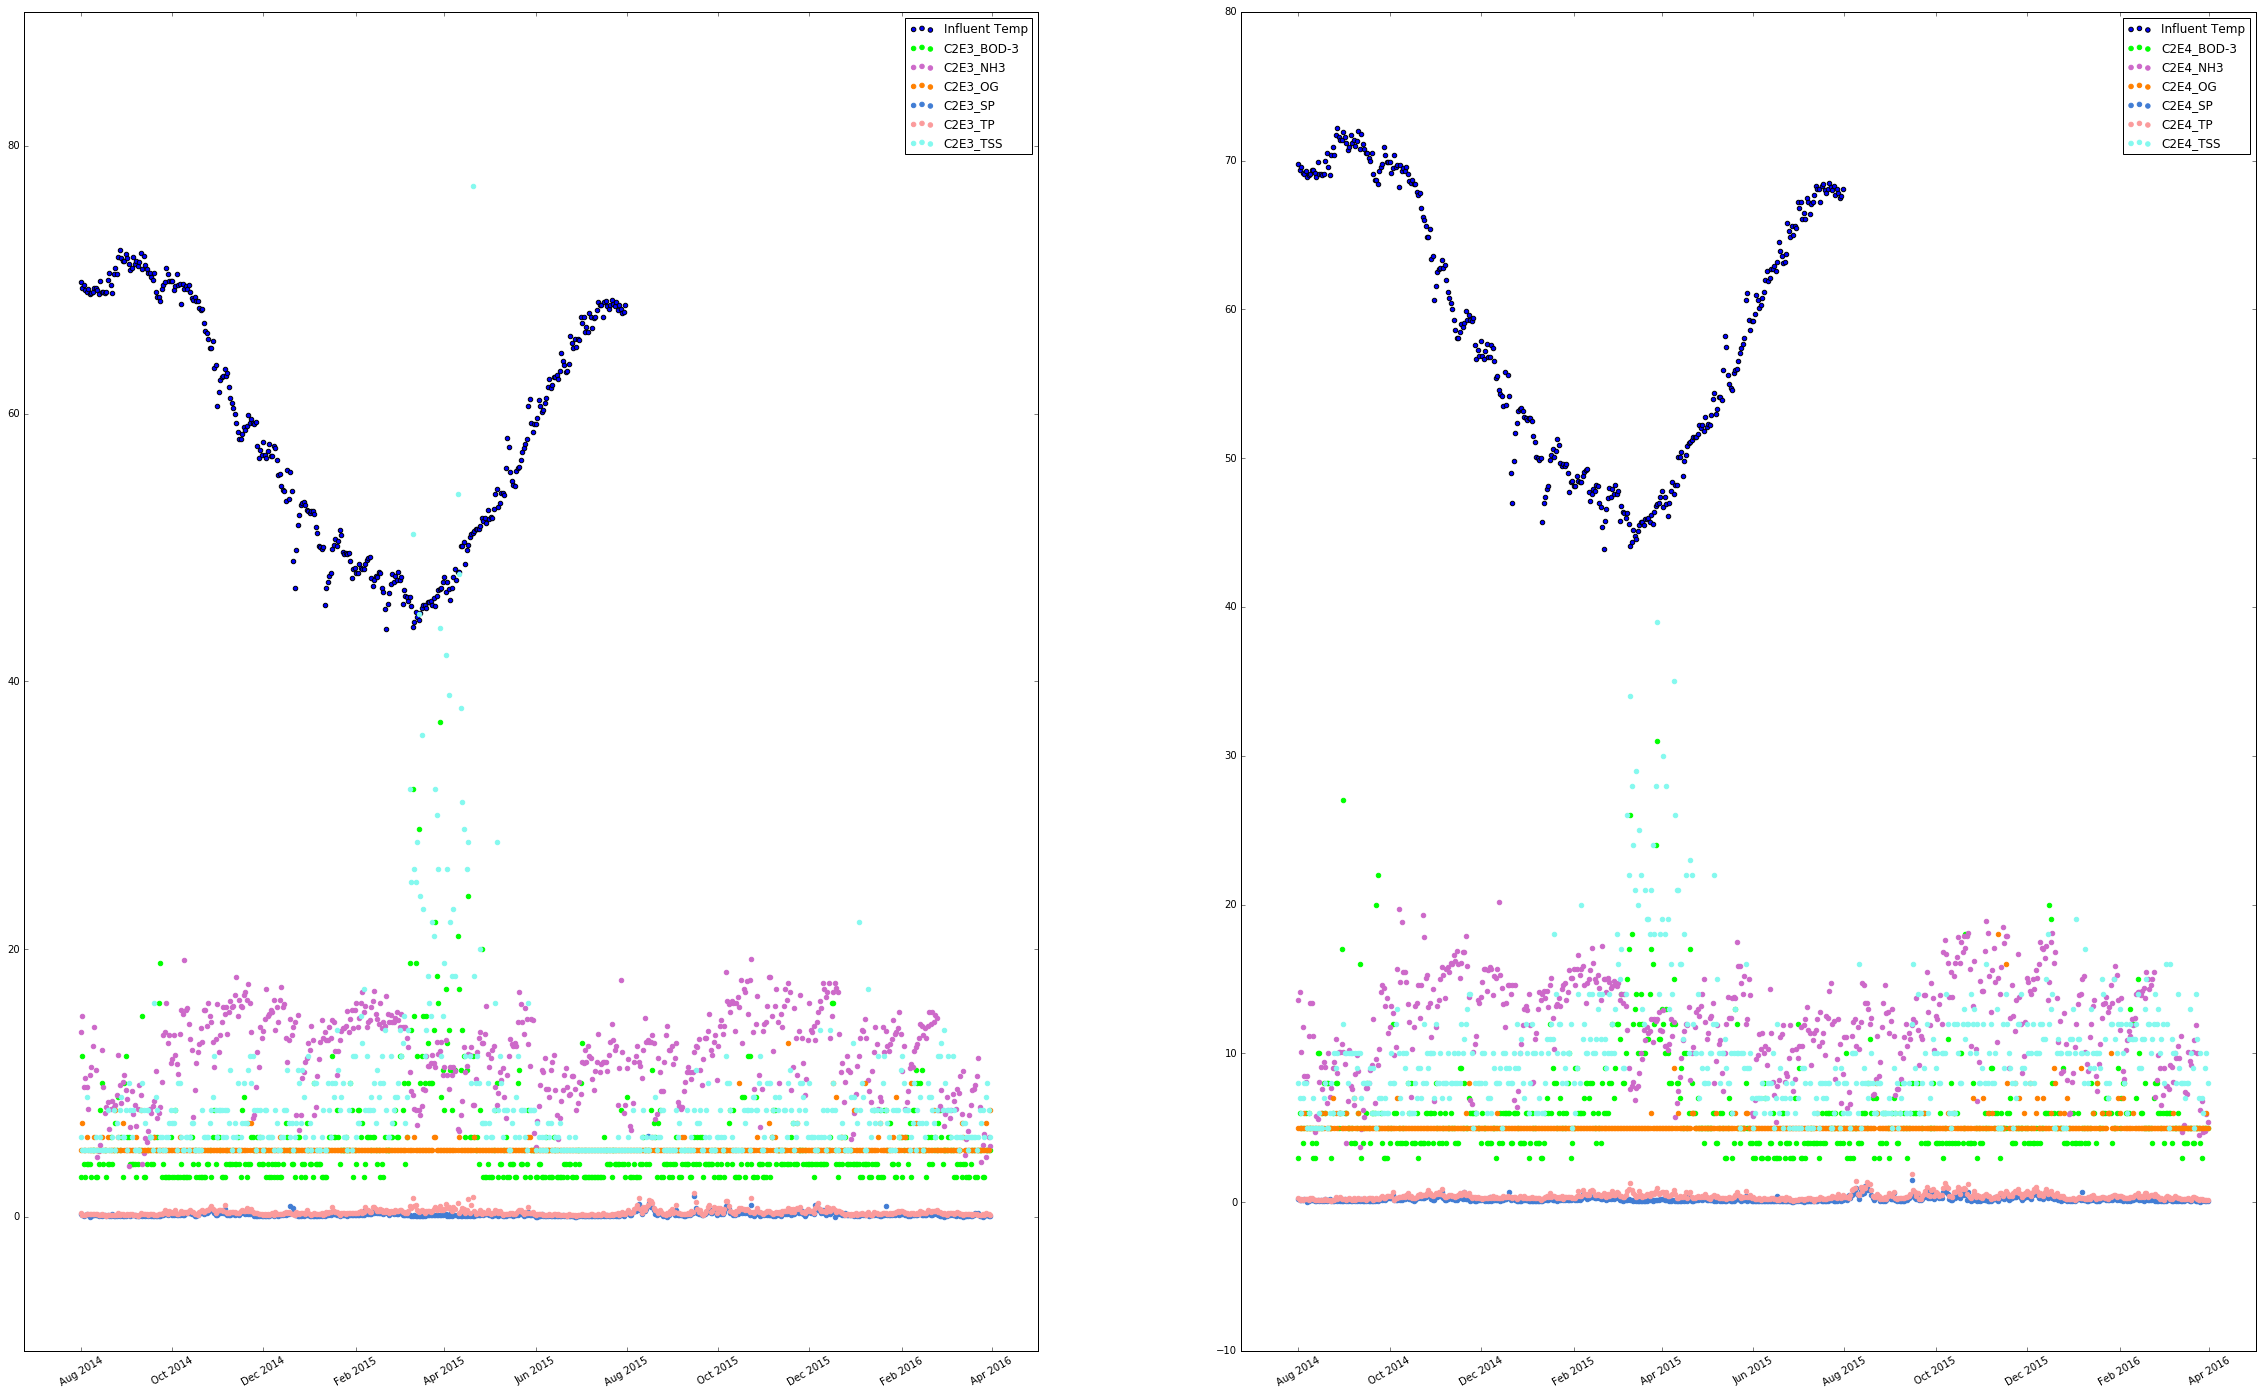

In [9]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))
    #else:
        #date_dt.append(date[i])
#print (len(date_dt))
#print (len(temp_dt))
#plt.plot_date(date_dt, 0)
value=[]
for i in range(len(date_dt)):
    value.append(i)
fig=plt.figure()
ax1=plt.subplot2grid((1, 2),(0,0))
ax2=plt.subplot2grid((1, 2),(0,1))


ax1.scatter(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax1.scatter(date_dt, df_modif['C2E3_BOD-3'], label='C2E3_BOD-3', color='#00ff00')
ax1.scatter(date_dt, df_modif['C2E3_NH3'], label='C2E3_NH3', color='#cd69c9')
ax1.scatter(date_dt, df_modif['C2E3_OG'], label='C2E3_OG', color='#ff8000')
ax1.scatter(date_dt, df_modif['C2E3_SP'], label='C2E3_SP', color='#417dd4')
ax1.scatter(date_dt, df_modif['C2E3_TP'], label='C2E3_TP', color='#fb9b9c')
ax1.scatter(date_dt, df_modif['C2E3_TSS'], label='C2E3_TSS', color='#84f9ef')
#ax1.scatter(date_dt, df_modif['C2E3_TS'], label='C2E3_TS', color='#fff400')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(30)
ax1.legend()

ax2.scatter(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax2.scatter(date_dt, df_modif['C2E4_BOD-3'], label='C2E4_BOD-3', color='#00ff00')
ax2.scatter(date_dt, df_modif['C2E4_NH3'], label='C2E4_NH3', color='#cd69c9')
ax2.scatter(date_dt, df_modif['C2E4_OG'], label='C2E4_OG', color='#ff8000')
ax2.scatter(date_dt, df_modif['C2E4_SP'], label='C2E4_SP', color='#417dd4')
ax2.scatter(date_dt, df_modif['C2E4_TP'], label='C2E4_TP', color='#fb9b9c')
ax2.scatter(date_dt, df_modif['C2E4_TSS'], label='C2E4_TSS', color='#84f9ef')
#ax2.scatter(date_dt, df_modif['C2E4_TS'], label='C2E4_TS', color='#fff400')
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(30)
ax2.legend()

#ax1.title('scatter\nplot')
#ax1.xlabel('time')
#ax1.ylabel('y')
plt.legend()
plt.show()

## 5- process specification in diffrent tanks

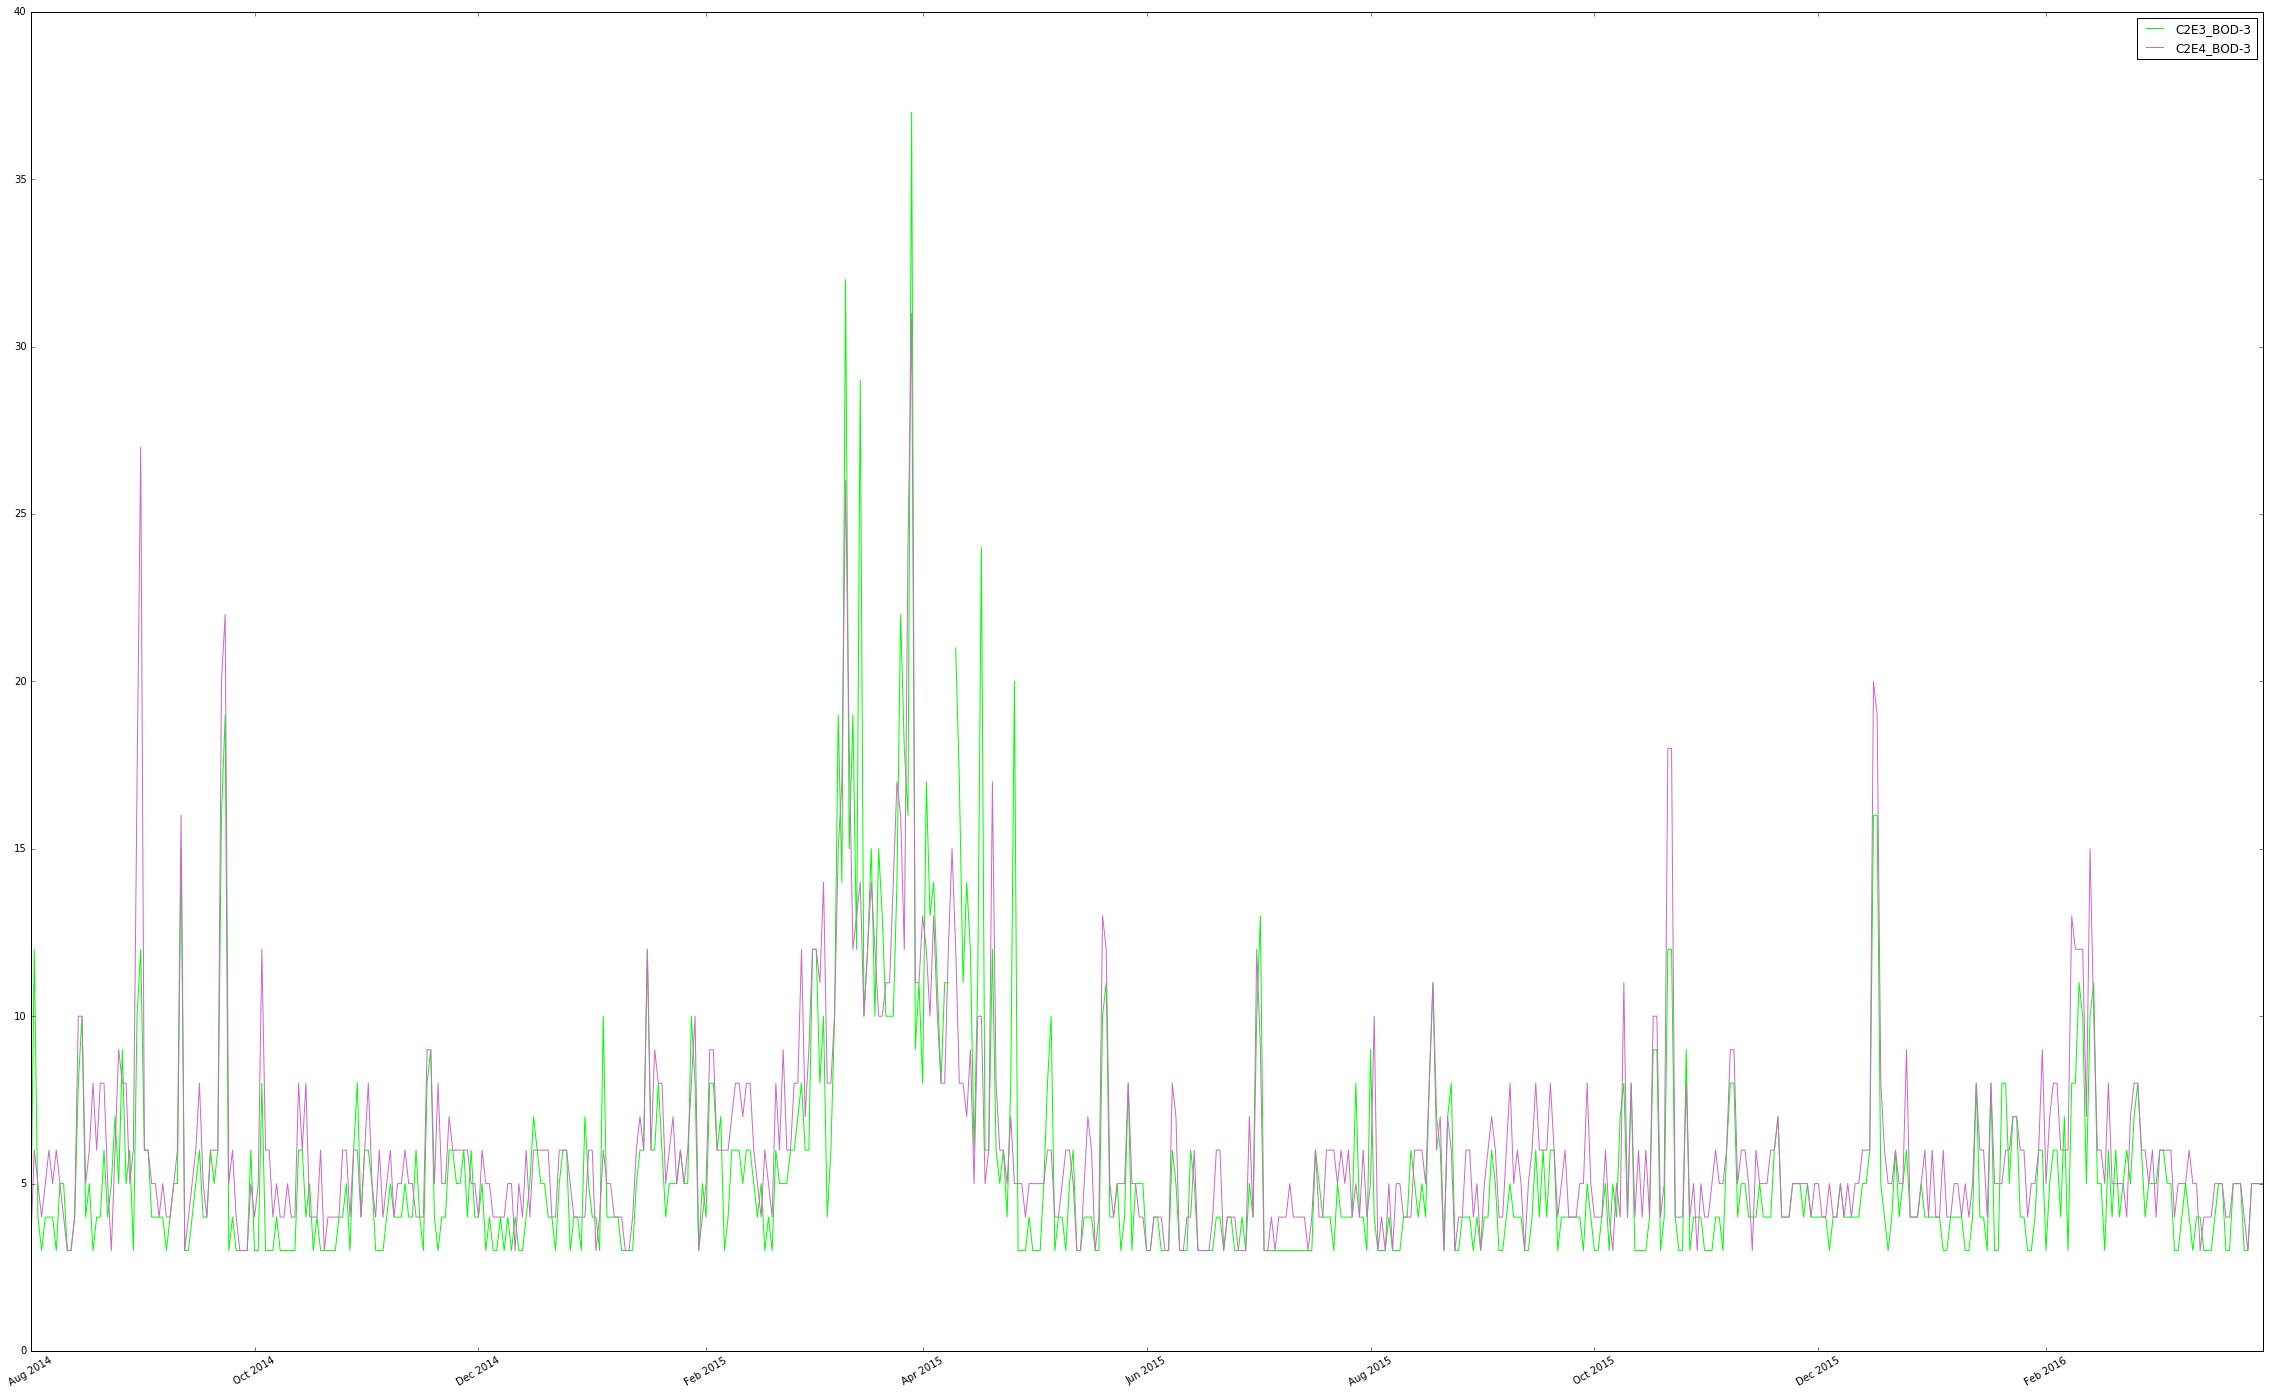

In [10]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax1=plt.subplot2grid((1, 1),(0,0))
#ax2=plt.subplot2grid((1, 1),(0,0))
#ax3=plt.subplot2grid((1, 1),(0,0))
#ax4=plt.subplot2grid((1, 1),(0,0))
#ax5=plt.subplot2grid((1, 1),(0,0))
#ax6=plt.subplot2grid((1, 1),(0,0))

#ax1.plot(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax1.plot(date_dt, df_modif['C2E3_BOD-3'], label='C2E3_BOD-3', color='#00ff00')
ax1.plot(date_dt, df_modif['C2E4_BOD-3'], label='C2E4_BOD-3', color='#cd69c9')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(30)
ax1.legend()

#ax2.plot(date_dt, df_modif['C2E3_NH3'], label='C2E3_NH3', color='#00ff00')
#ax2.plot(date_dt, df_modif['C2E4_NH3'], label='C2E4_NH3', color='#cd69c9')
#for label in ax2.xaxis.get_ticklabels():
    #label.set_rotation(30)
#ax2.legend()

#ax3.plot(date_dt, df_modif['C2E3_OG'], label='C2E3_OG', color='#00ff00')
#ax3.plot(date_dt, df_modif['C2E4_OG'], label='C2E4_OG', color='#cd69c9')
#for label in ax3.xaxis.get_ticklabels():
    #label.set_rotation(30)
#ax3.legend()

#ax4.plot(date_dt, df_modif['C2E3_SP'], label='C2E3_SP', color='#00ff00')
#ax4.plot(date_dt, df_modif['C2E4_SP'], label='C2E4_SP', color='#cd69c9')
#for label in ax4.xaxis.get_ticklabels():
    #label.set_rotation(30)
#ax4.legend()

#ax5.plot(date_dt, df_modif['C2E3_TP'], label='C2E3_TP', color='#00ff00')
#ax5.plot(date_dt, df_modif['C2E4_TP'], label='C2E4_TP', color='#cd69c9')
#for label in ax5.xaxis.get_ticklabels():
    #label.set_rotation(30)
#ax5.legend()

#ax6.plot(date_dt, df_modif['C2E3_TSS'], label='C2E3_TSS', color='#00ff00')
#ax6.plot(date_dt, df_modif['C2E4_TSS'], label='C2E4_TSS', color='#cd69c9')
#for label in ax6.xaxis.get_ticklabels():
    #label.set_rotation(30)
#ax6.legend()

#ax1.scatter(date_dt, df_modif['C2E3_TS'], label='C2E3_TS', color='#fff400')
#ax1.scatter(date_dt, df_modif['C2E4_TS'], label='C2E3_TS', color='#cd69c9')
#for label in ax1.xaxis.get_ticklabels():
    #label.set_rotation(30)
#ax1.legend()


plt.legend()
plt.show()

## 6- recycle - buffer VS. time

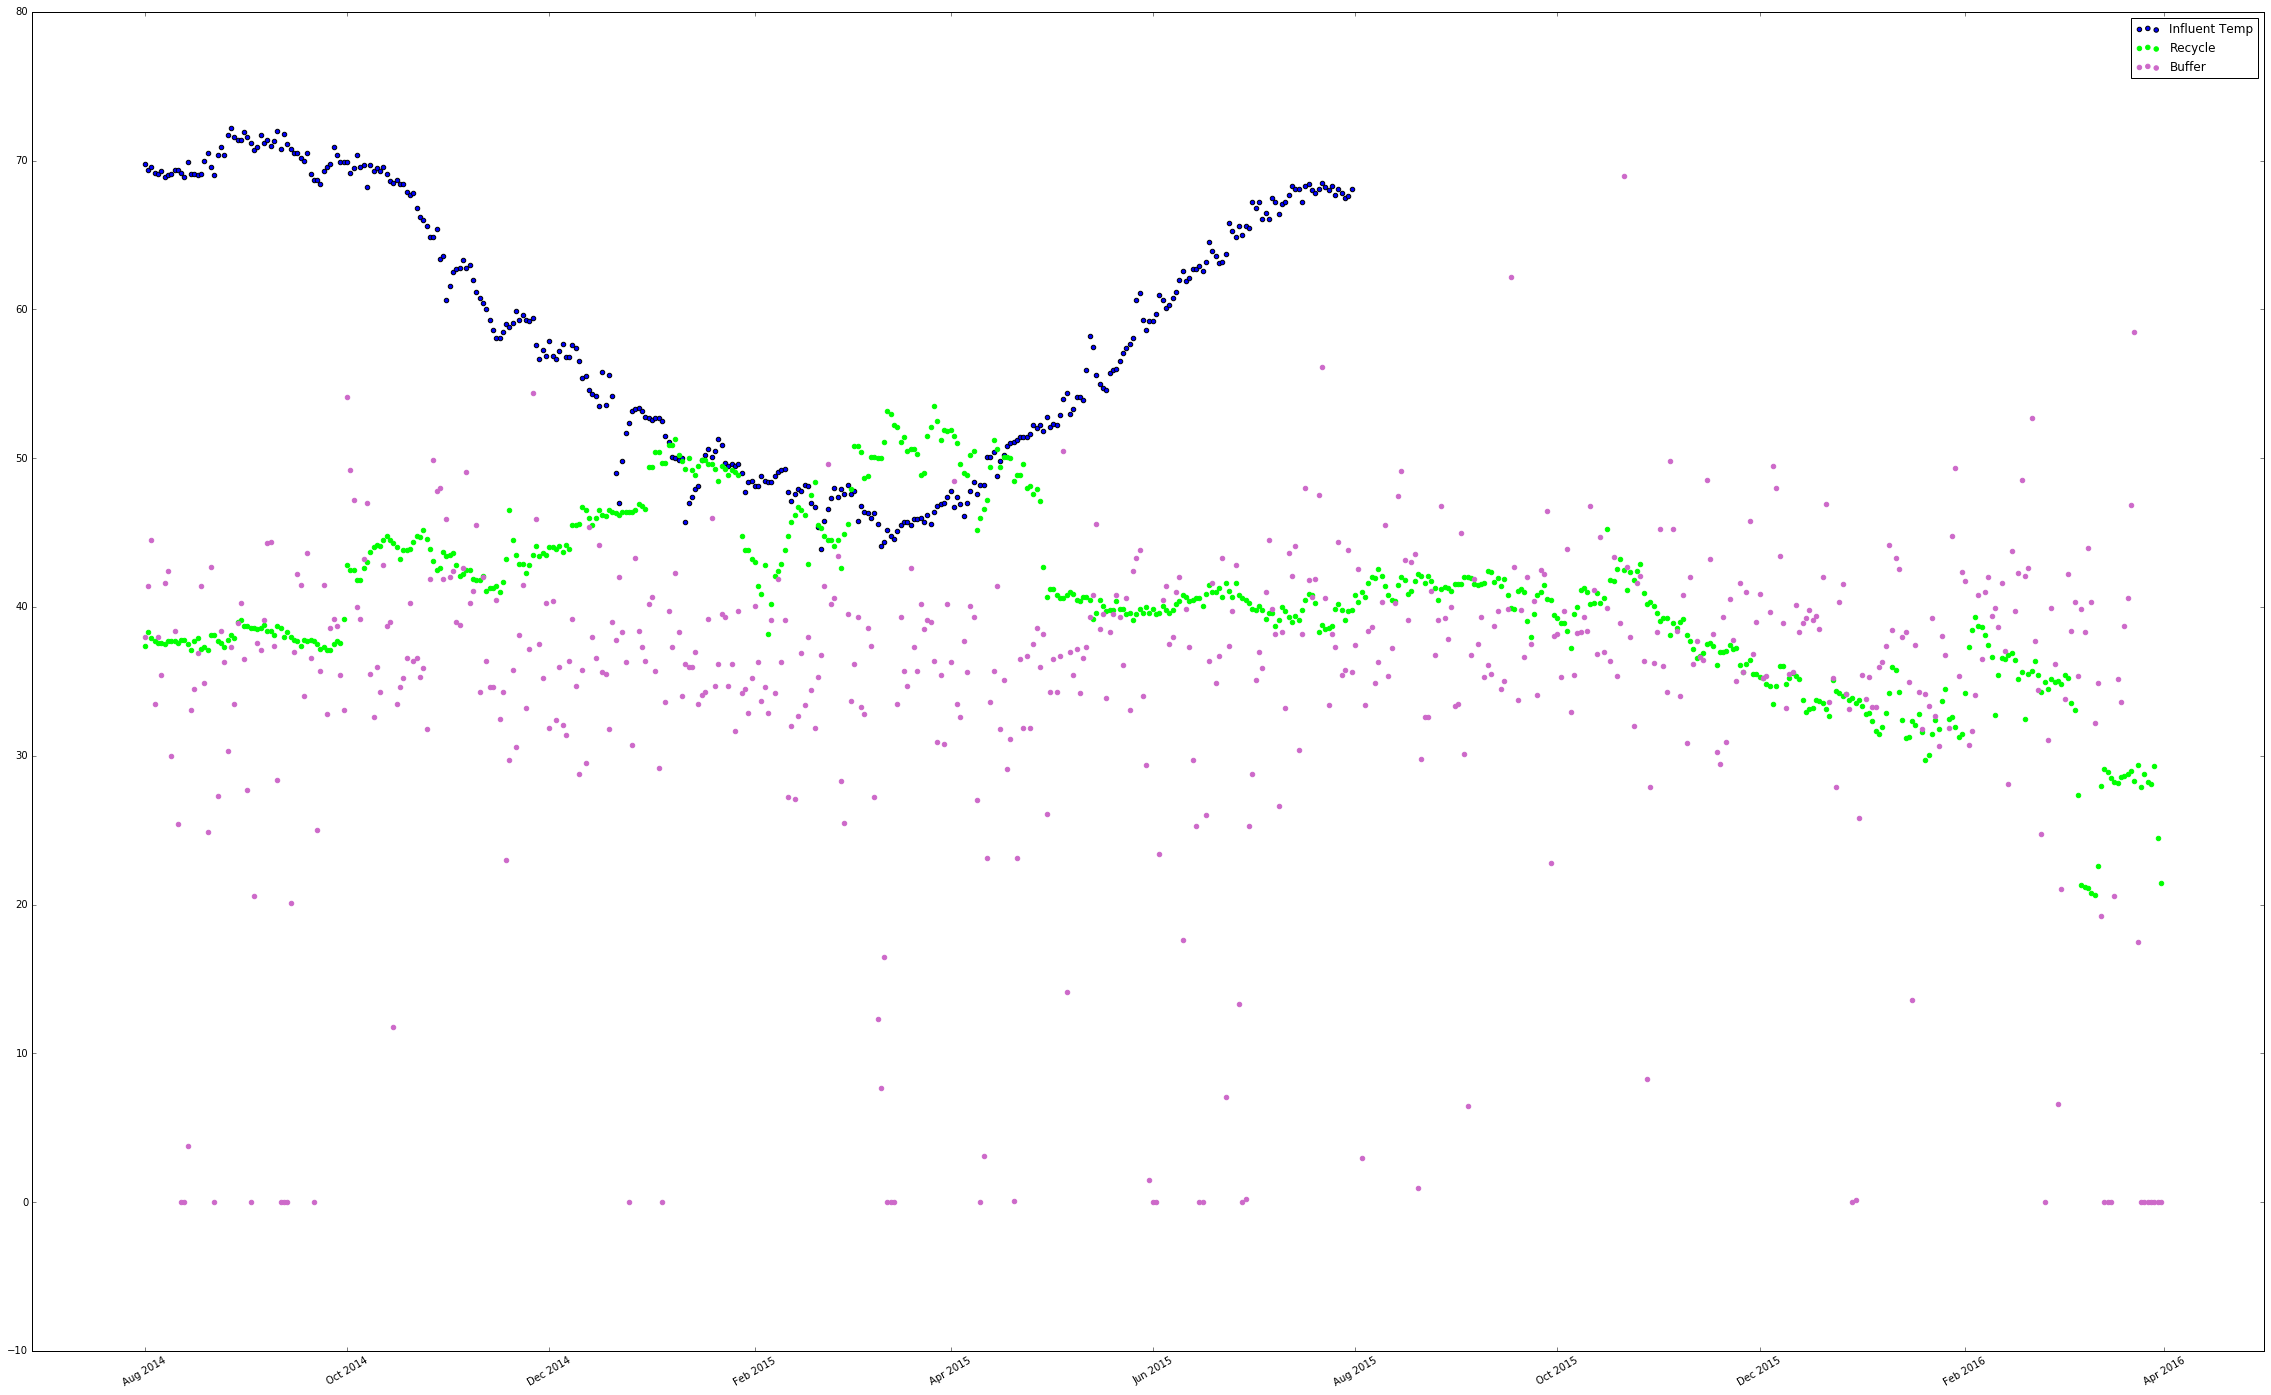

In [11]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))


fig=plt.figure()
ax1=plt.subplot2grid((1, 1),(0,0))

ax1.scatter(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax1.scatter(date_dt, df_modif['Recycle'], label='Recycle', color='#00ff00')
ax1.scatter(date_dt, df_modif['Buffer'], label='Buffer', color='#cd69c9')

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(30)
ax1.legend()

plt.legend()
plt.show()

## 7- Aeration parameters

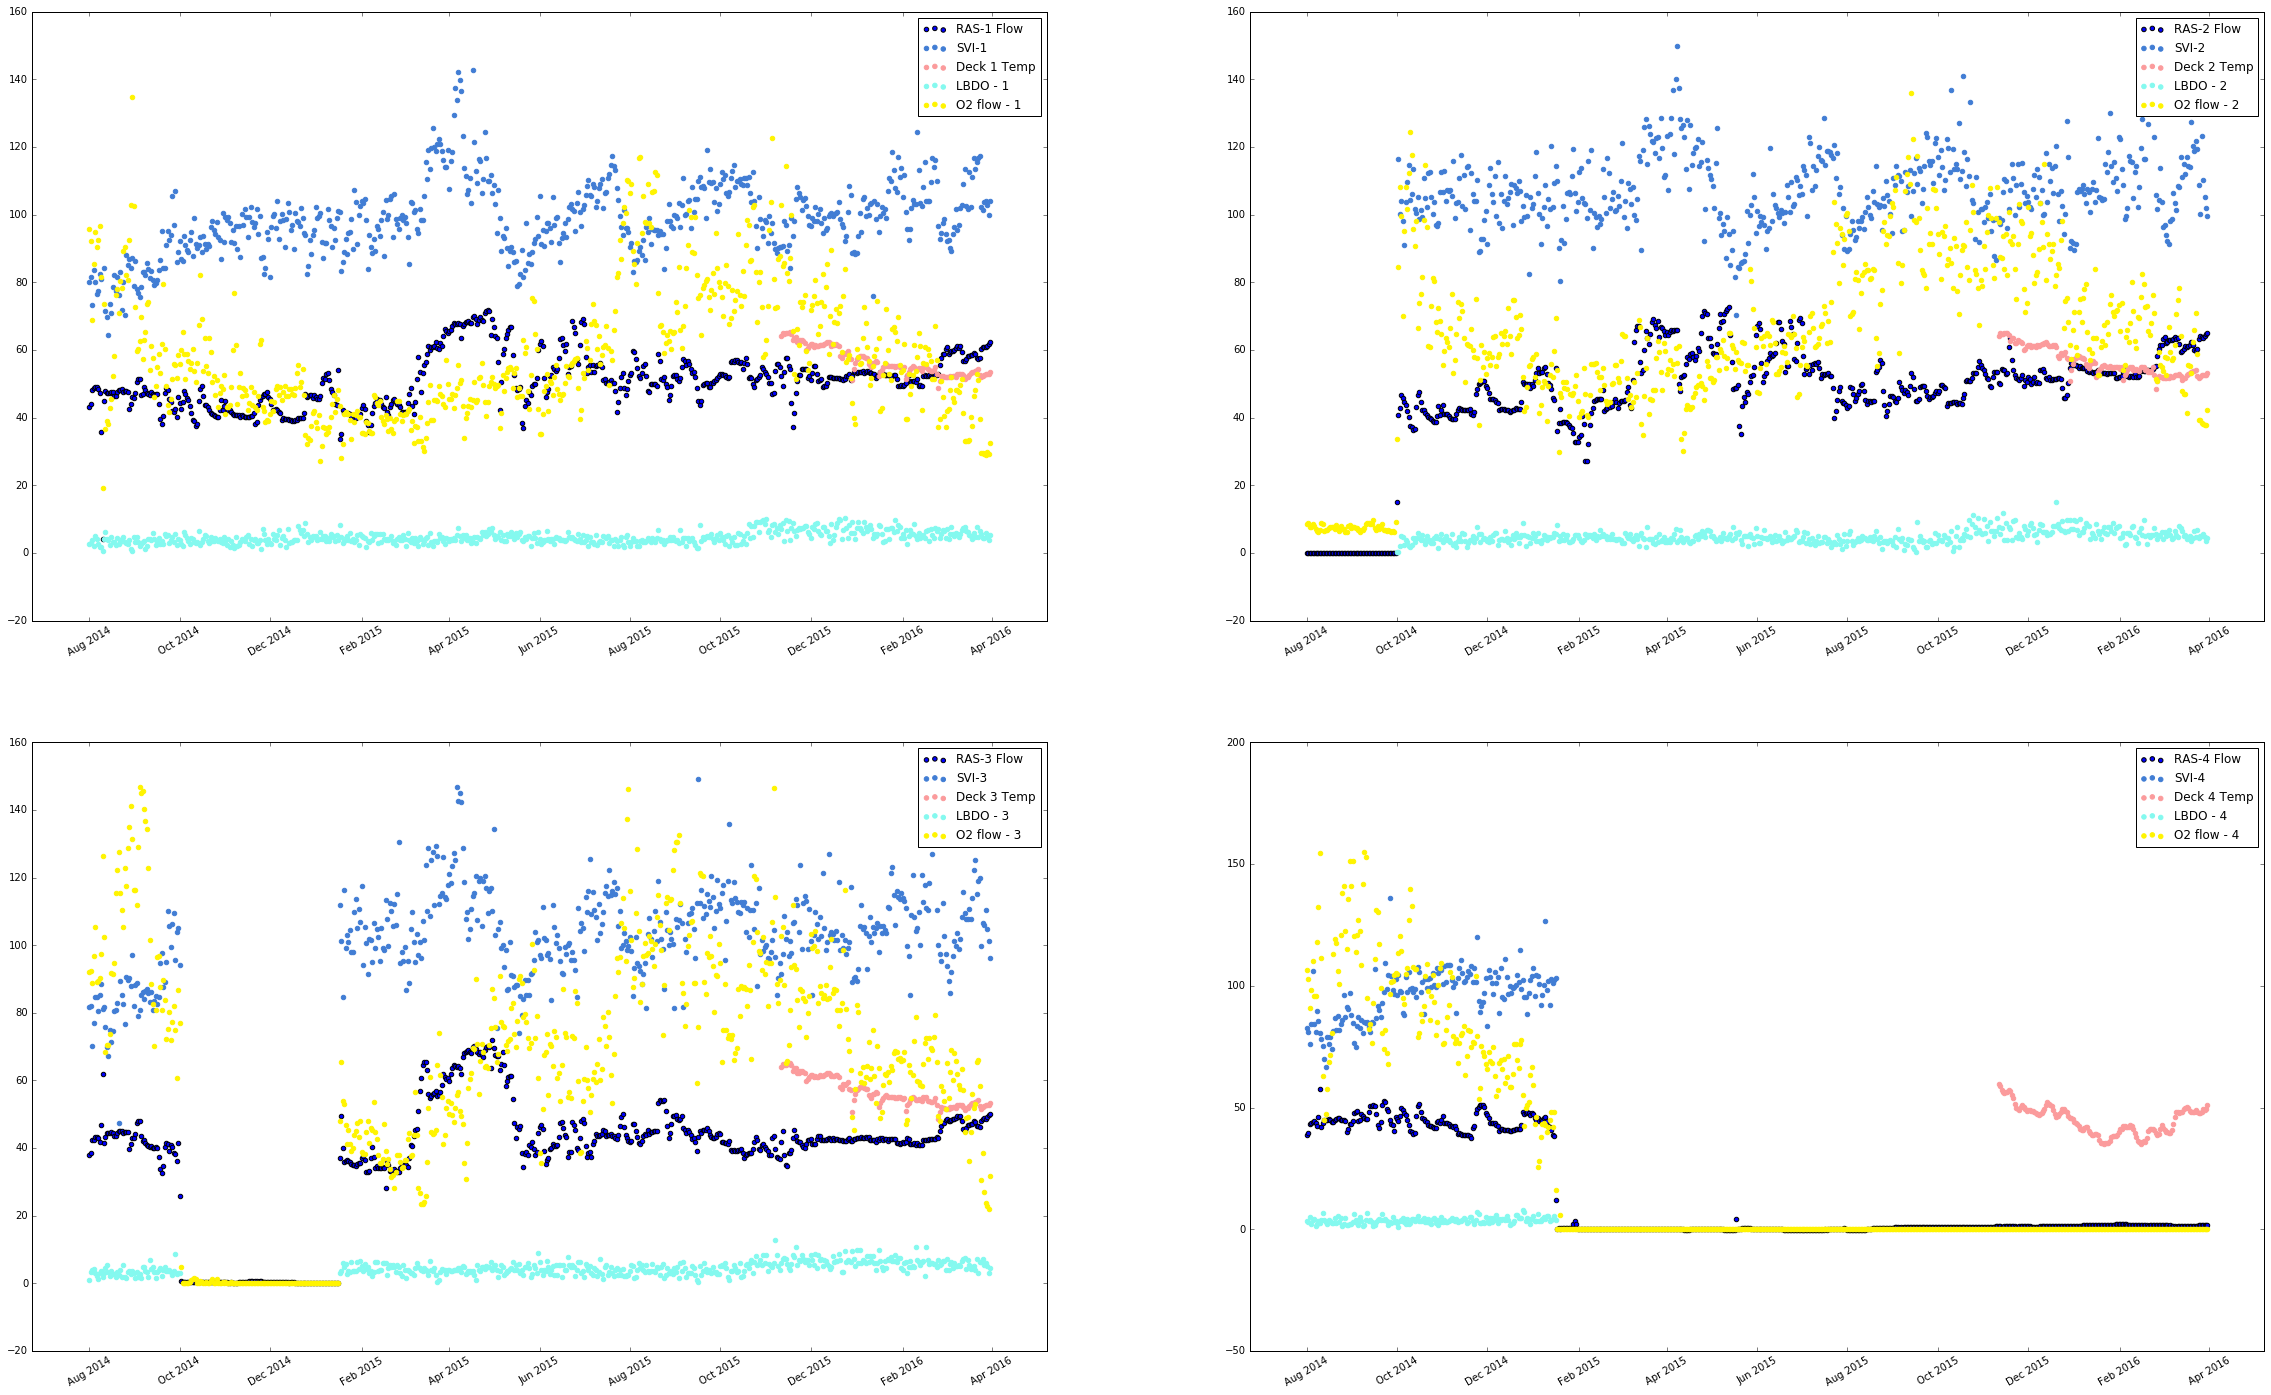

In [12]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))
    #else:
        #date_dt.append(date[i])


fig=plt.figure()
ax1=plt.subplot2grid((2,2),(0,0))
ax2=plt.subplot2grid((2,2),(0,1))
ax3=plt.subplot2grid((2,2),(1,0))
ax4=plt.subplot2grid((2,2),(1,1))
ax1.scatter(date_dt, df_modif['RAS-1 Flow'], label='RAS-1 Flow')
#ax1.scatter(date_dt, df_modif['RAS-1_TSS'], label='RAS-1_TSS', color='#00ff00')
#ax1.scatter(date_dt, df_modif['MLSS-1'], label='MLSS-1', color='#cd69c9')
#ax1.scatter(date_dt, df_modif['MLVSS-1'], label='MLVSS-1', color='#ff8000')
ax1.scatter(date_dt, df_modif['SVI-1'], label='SVI-1', color='#417dd4')
ax1.scatter(date_dt, df_modif['Deck 1 Temp'], label='Deck 1 Temp', color='#fb9b9c')
ax1.scatter(date_dt, df_modif['LBDO - 1'], label='LBDO - 1', color='#84f9ef')
ax1.scatter(date_dt, df_modif['O2 flow - 1'], label='O2 flow - 1', color='#fff400')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(30)
ax1.legend()
ax2.scatter(date_dt, df_modif['RAS-2 Flow'], label='RAS-2 Flow')
#ax2.scatter(date_dt, df_modif['RAS-2_TSS'], label='RAS-2_TSS', color='#00ff00')
#ax2.scatter(date_dt, df_modif['MLSS-2'], label='MLSS-2', color='#cd69c9')
#ax2.scatter(date_dt, df_modif['MLVSS-2'], label='MLVSS-2', color='#ff8000')
ax2.scatter(date_dt, df_modif['SVI-2'], label='SVI-2', color='#417dd4')
ax2.scatter(date_dt, df_modif['Deck 2 Temp'], label='Deck 2 Temp', color='#fb9b9c')
ax2.scatter(date_dt, df_modif['LBDO - 2'], label='LBDO - 2', color='#84f9ef')
ax2.scatter(date_dt, df_modif['O2 flow - 2'], label='O2 flow - 2', color='#fff400')
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(30)
ax2.legend()
ax3.scatter(date_dt, df_modif['RAS-3 Flow'], label='RAS-3 Flow')
#ax3.scatter(date_dt, df_modif['RAS-3_TSS'], label='RAS-3_TSS', color='#00ff00')
#ax3.scatter(date_dt, df_modif['MLSS-3'], label='MLSS-3', color='#cd69c9')
#ax3.scatter(date_dt, df_modif['MLVSS-3'], label='MLVSS-3', color='#ff8000')
ax3.scatter(date_dt, df_modif['SVI-3'], label='SVI-3', color='#417dd4')
ax3.scatter(date_dt, df_modif['Deck 3 Temp'], label='Deck 3 Temp', color='#fb9b9c')
ax3.scatter(date_dt, df_modif['LBDO - 3'], label='LBDO - 3', color='#84f9ef')
ax3.scatter(date_dt, df_modif['O2 flow - 3'], label='O2 flow - 3', color='#fff400')
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(30)
ax3.legend()
ax4.scatter(date_dt, df_modif['RAS-4 Flow'], label='RAS-4 Flow')
#ax4.scatter(date_dt, df_modif['RAS-4_TSS'], label='RAS-4_TSS', color='#00ff00')
#ax4.scatter(date_dt, df_modif['MLSS-4'], label='MLSS-4', color='#cd69c9')
#ax4.scatter(date_dt, df_modif['MLVSS-4'], label='MLVSS-4', color='#ff8000')
ax4.scatter(date_dt, df_modif['SVI-4'], label='SVI-4', color='#417dd4')
ax4.scatter(date_dt, df_modif['Deck 4 Temp'], label='Deck 4 Temp', color='#fb9b9c')
ax4.scatter(date_dt, df_modif['LBDO - 4'], label='LBDO - 4', color='#84f9ef')
ax4.scatter(date_dt, df_modif['O2 flow - 4'], label='O2 flow - 4', color='#fff400')
for label in ax4.xaxis.get_ticklabels():
    label.set_rotation(30)
ax4.legend()
#ax1.title('scatter\nplot')
#ax1.xlabel('time')
#ax1.ylabel('y')
plt.legend()
plt.show()

## 8- Aeration process in diffrent tanks

#### Flow

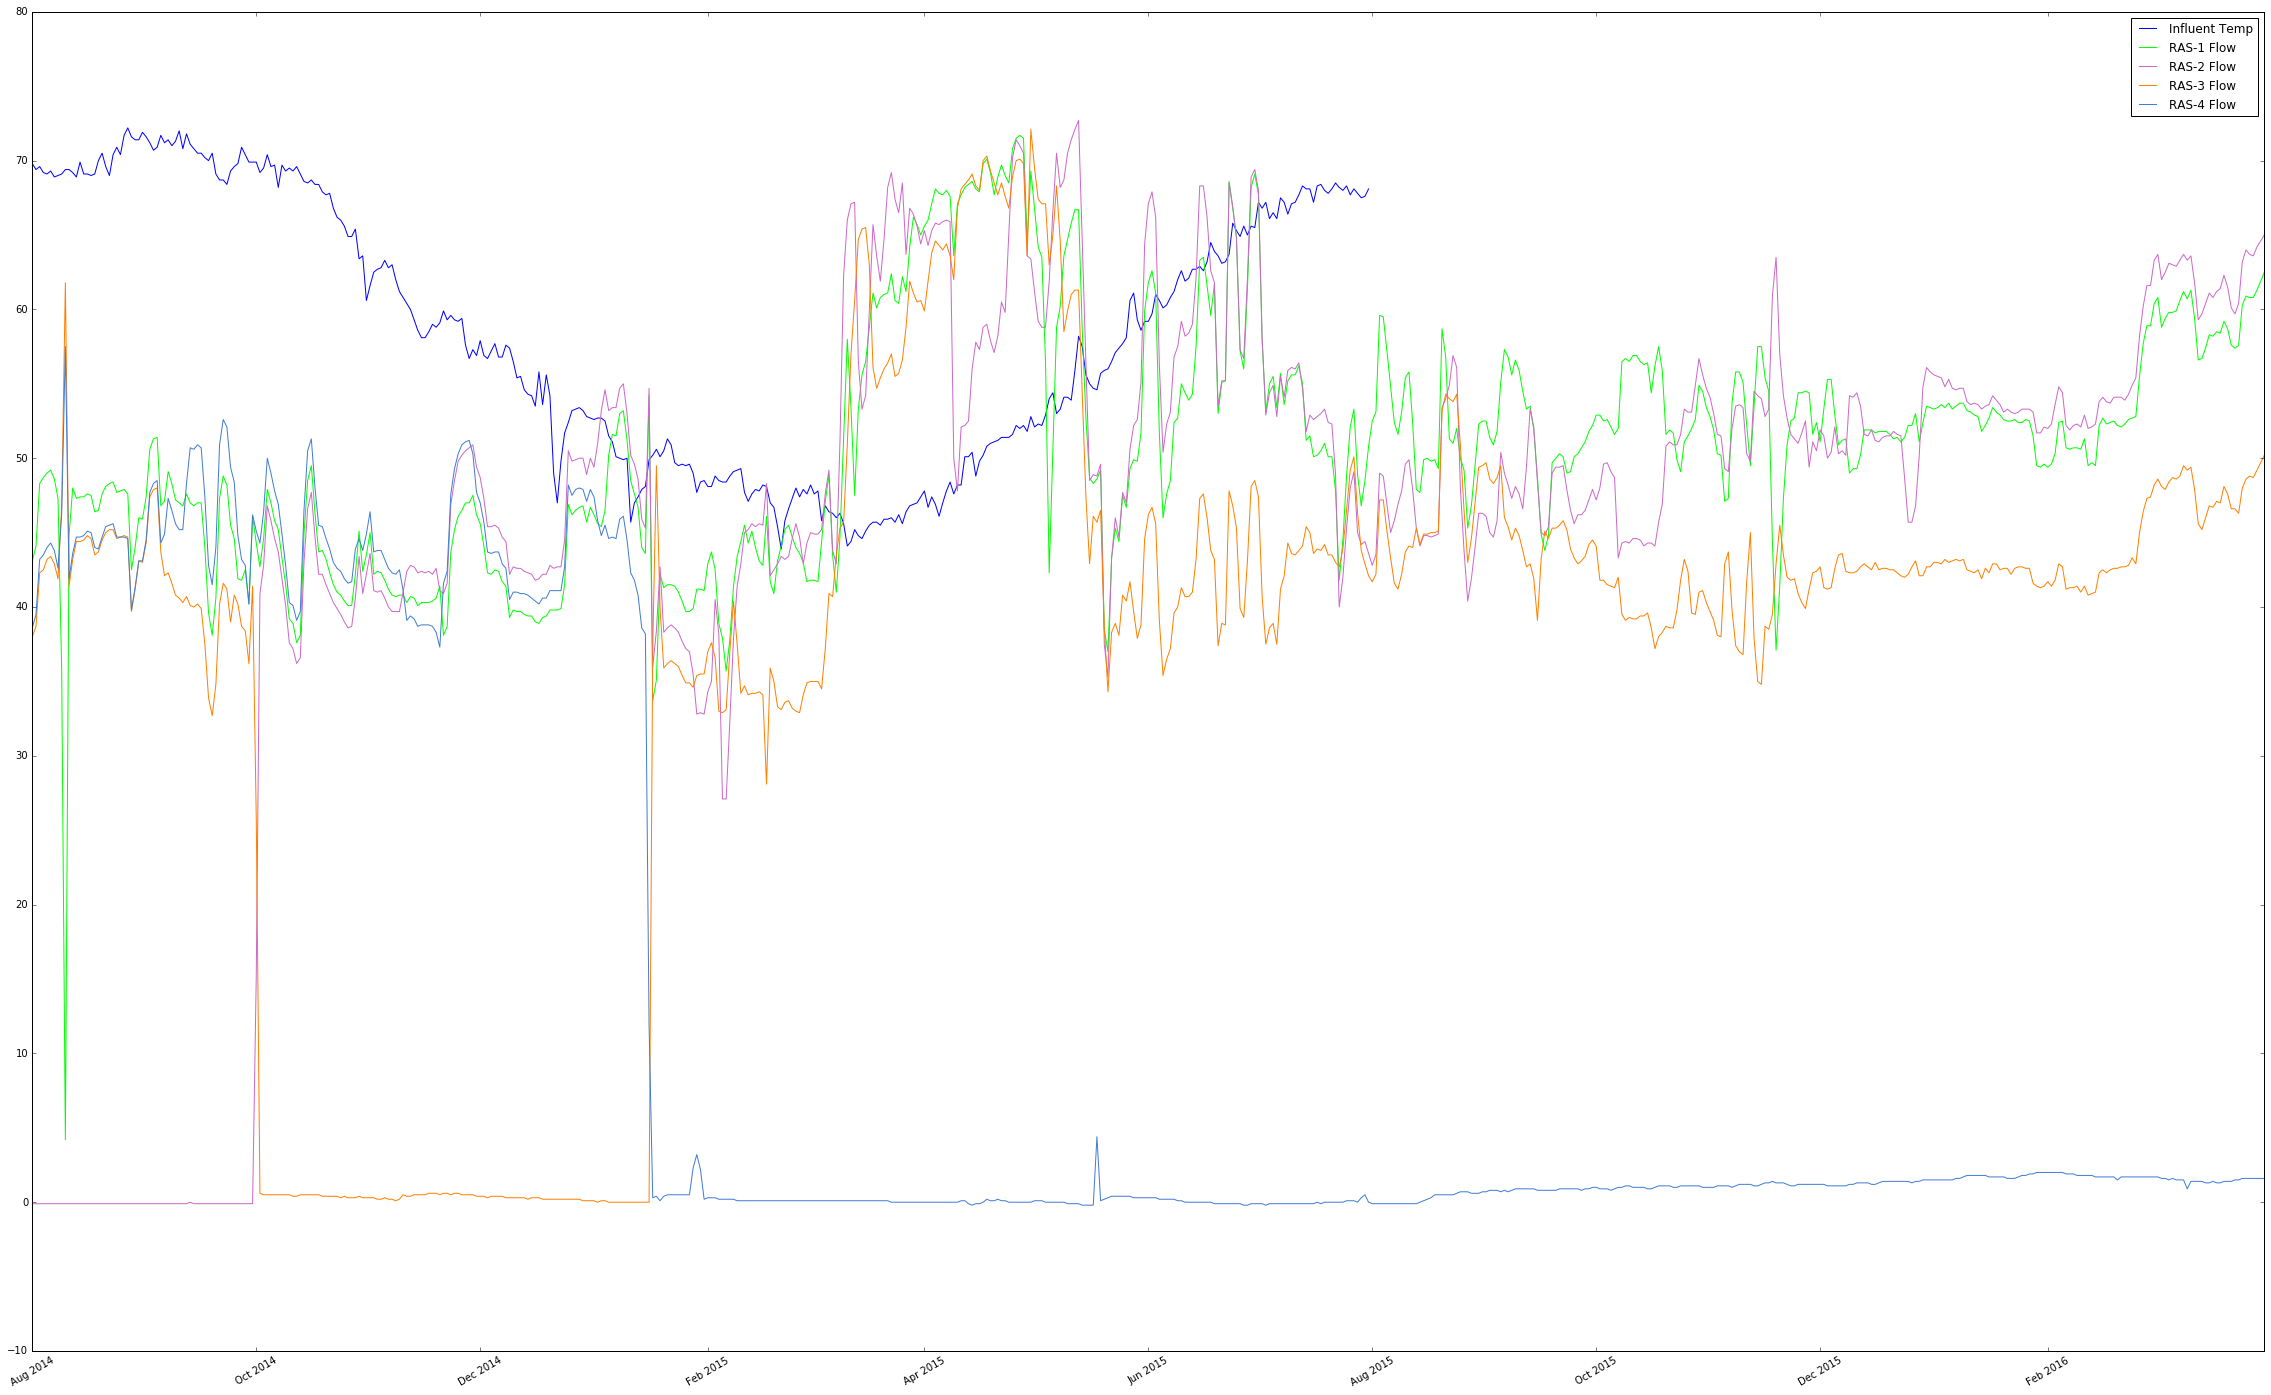

In [13]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax1=plt.subplot2grid((1, 1),(0,0))

ax1.plot(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax1.plot(date_dt, df_modif['RAS-1 Flow'], label='RAS-1 Flow', color='#00ff00')
ax1.plot(date_dt, df_modif['RAS-2 Flow'], label='RAS-2 Flow', color='#cd69c9')
ax1.plot(date_dt, df_modif['RAS-3 Flow'], label='RAS-3 Flow', color='#ff8000')
ax1.plot(date_dt, df_modif['RAS-4 Flow'], label='RAS-4 Flow', color='#417dd4')
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(30)
ax1.legend()

plt.legend()
plt.show()

#### TSS

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


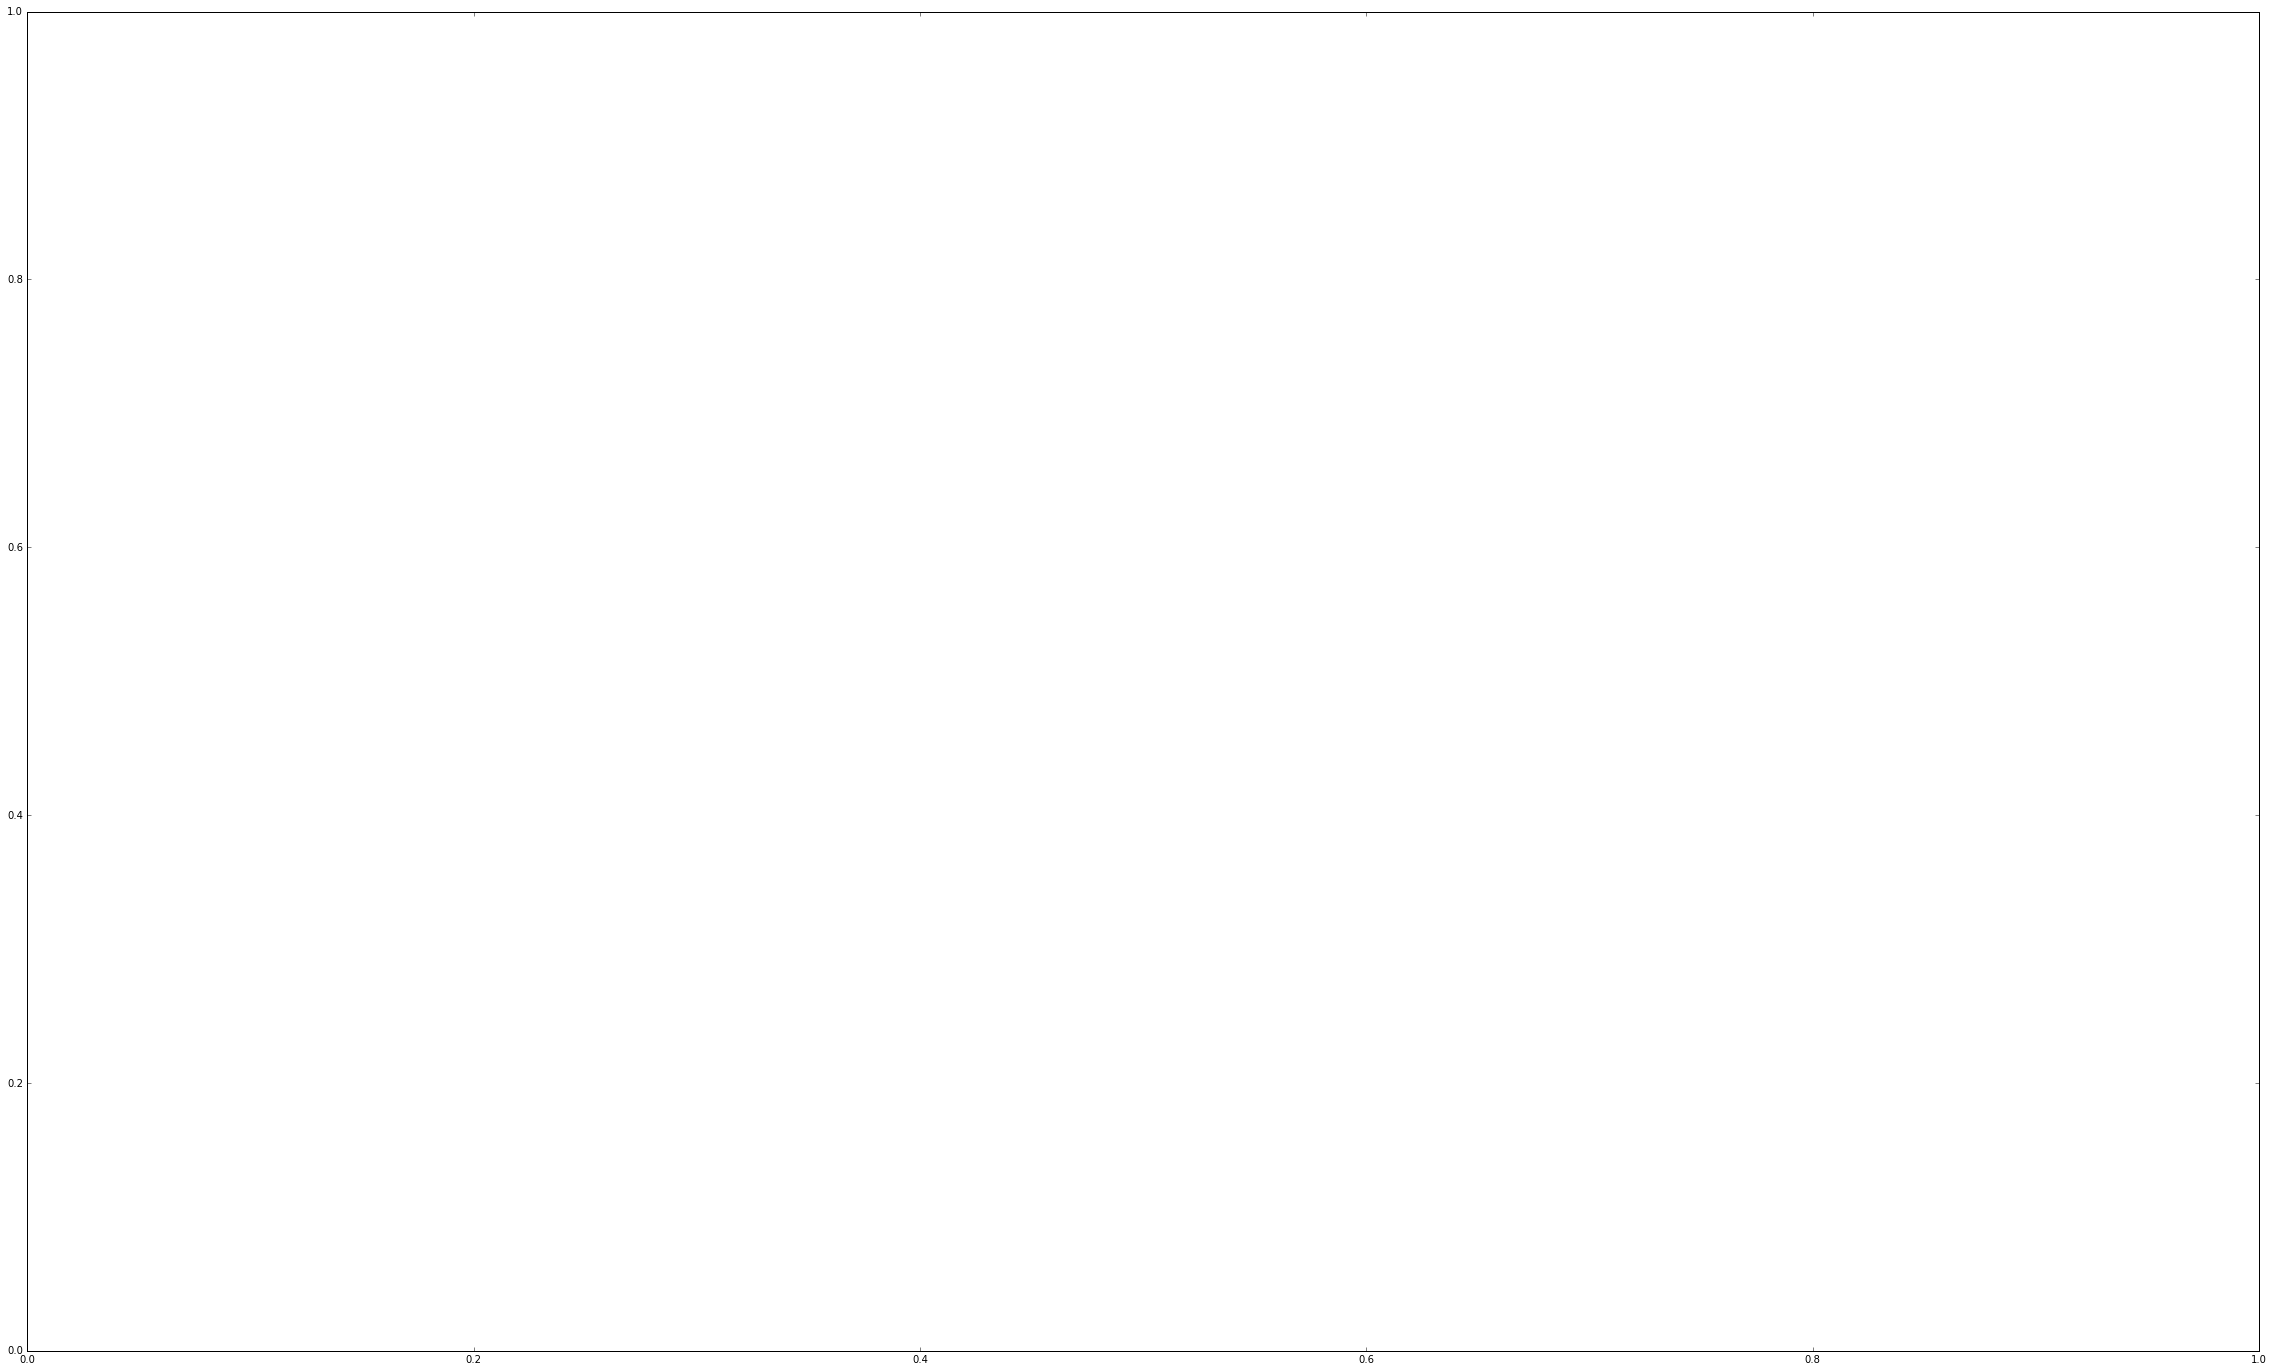

In [9]:
date_dt=[]
a=[]
RAS_2_TSS=[]
RAS_3_TSS=[]
RAS_4_TSS=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))
        try:
            t1 = df_modif['RAS-1_TSS'][i]
            #t2 = df_modif['RAS-2_TSS'][i]
            #t3 = df_modif['RAS-3_TSS'][i]
            #t4 = df_modif['RAS-4_TSS'][i]
            a.append(float(t1.replace(',', '')))
            #RAS_2_TSS.append(float(t2.replace(',', '')))
            #RAS_3_TSS.append(float(t3.replace(',', '')))
            #RAS_4_TSS.append(float(t4.replace(',', '')))
        except:
            a.append(0.0)
            #RAS_2_TSS.append(0.0)
            #RAS_3_TSS.append(0.0)
            #RAS_4_TSS.append(0.0)

fig=plt.figure()
ax1=plt.subplot2grid((1, 1),(0,0))
#ax2=plt.subplot2grid((1, 1),(0,0))
#ax3=plt.subplot2grid((1, 1),(0,0))
#ax4=plt.subplot2grid((1, 1),(0,0))

ax2.plot(date_dt, a, label='RAS-1_TSS', color='#00ff00')
#ax2.plot(date_dt, RAS_2_TSS, label='RAS-2_TSS', color='#cd69c9')
#ax2.plot(date_dt, RAS_3_TSS, label='RAS-3_TSS', color='#ff8000')
#ax2.plot(date_dt, RAS_4_TSS, label='RAS-4_TSS', color='#417dd4')
for label in ax2.xaxis.get_ticklabels():
    label.set_rotation(30)
ax2.legend()

plt.legend()
plt.show()

#### MLSS

In [ ]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax3=plt.subplot2grid((1, 1),(0,0))

ax3.plot(date_dt, df_modif['MLSS-1'], label='MLSS-1', color='#00ff00')
ax3.plot(date_dt, df_modif['MLSS-2'], label='MLSS-2', color='#cd69c9')
ax3.plot(date_dt, df_modif['MLSS-3'], label='MLSS-3', color='#ff8000')
ax3.plot(date_dt, df_modif['MLSS-4'], label='MLSS-4', color='#417dd4')
for label in ax3.xaxis.get_ticklabels():
    label.set_rotation(30)
ax3.legend()

plt.legend()
plt.show()

#### MLVSS

In [ ]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax4=plt.subplot2grid((1, 1),(0,0))

ax4.plot(date_dt, df_modif['MLVSS-1'], label='MLVSS-1', color='#00ff00')
ax4.plot(date_dt, df_modif['MLVSS-2'], label='MLVSS-2', color='#cd69c9')
ax4.plot(date_dt, df_modif['MLVSS-3'], label='MLVSS-3', color='#ff8000')
ax4.plot(date_dt, df_modif['MLVSS-4'], label='MLVSS-4', color='#417dd4')
for label in ax4.xaxis.get_ticklabels():
    label.set_rotation(30)
ax4.legend()

plt.legend()
plt.show()

#### SVI

In [53]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax5=plt.subplot2grid((1, 1),(0,0))

ax5.plot(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax5.plot(date_dt, df_modif['SVI-1'], label='SVI-1', color='#00ff00')
ax5.plot(date_dt, df_modif['SVI-2'], label='SVI-2', color='#cd69c9')
ax5.plot(date_dt, df_modif['SVI-3'], label='SVI-3', color='#ff8000')
ax5.plot(date_dt, df_modif['SVI-4'], label='SVI-4', color='#417dd4')
for label in ax5.xaxis.get_ticklabels():
    label.set_rotation(30)
ax5.legend()

plt.legend()
plt.show()

#### TEMP

In [54]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax6=plt.subplot2grid((1, 1),(0,0))

ax6.plot(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax6.plot(date_dt, df_modif['Deck 1 Temp'], label='Deck 1 Temp', color='#00ff00')
ax6.plot(date_dt, df_modif['Deck 2 Temp'], label='Deck 2 Temp', color='#cd69c9')
ax6.plot(date_dt, df_modif['Deck 3 Temp'], label='Deck 3 Temp', color='#ff8000')
ax6.plot(date_dt, df_modif['Deck 4 Temp'], label='Deck 4 Temp', color='#417dd4')
for label in ax6.xaxis.get_ticklabels():
    label.set_rotation(30)
ax6.legend()

plt.legend()
plt.show()

#### LBDO

In [57]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax7=plt.subplot2grid((1, 1),(0,0))

#ax7.plot(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax7.plot(date_dt, df_modif['LBDO - 1'], label='LBDO - 1', color='#fff400')
ax7.plot(date_dt, df_modif['LBDO - 2'], label='LBDO - 2', color='#cd69c9')
ax7.plot(date_dt, df_modif['LBDO - 3'], label='LBDO - 3', color='#ff8000')
ax7.plot(date_dt, df_modif['LBDO - 4'], label='LBDO - 4', color='#417dd4')
for label in ax7.xaxis.get_ticklabels():
    label.set_rotation(30)
ax7.legend()

plt.legend()
plt.show()

#### O2 flow

In [60]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax8=plt.subplot2grid((1, 1),(0,0))

ax8.plot(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax8.scatter(date_dt, df_modif['O2 flow - 1'], label='O2 flow - 1', color='#fff400')
ax8.scatter(date_dt, df_modif['O2 flow - 2'], label='O2 flow - 2', color='#cd69c9')
ax8.scatter(date_dt, df_modif['O2 flow - 3'], label='O2 flow - 3', color='#ff8000')
ax8.scatter(date_dt, df_modif['O2 flow - 4'], label='O2 flow - 4', color='#417dd4')
for label in ax8.xaxis.get_ticklabels():
    label.set_rotation(30)
ax8.legend()

plt.legend()
plt.show()

#### Pressure

In [63]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax9=plt.subplot2grid((1, 1),(0,0))

#ax9.plot(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax9.plot(date_dt, df_modif['Pressure - 1'], label='Pressure - 1', color='#fff400')
ax9.plot(date_dt, df_modif['Pressure - 2'], label='Pressure - 2', color='#cd69c9')
ax9.plot(date_dt, df_modif['Pressure - 3'], label='Pressure - 3', color='#ff8000')
ax9.plot(date_dt, df_modif['Pressure - 4'], label='Pressure - 4', color='#417dd4')
for label in ax9.xaxis.get_ticklabels():
    label.set_rotation(30)
ax9.legend()

plt.legend()
plt.show()

#### Vent %

In [64]:
date_dt=[]
for i in range(len(date)):
    if i>=2 :
        date_dt.append(dt.datetime.strptime(date[i], '%m/%d/%Y'))

fig=plt.figure()
ax10=plt.subplot2grid((1, 1),(0,0))

ax10.plot(date_dt, df_modif['Influent Temp'], label='Influent Temp')
ax10.scatter(date_dt, df_modif['Vent % - 1'], label='Vent % - 1', color='#fff400')
ax10.scatter(date_dt, df_modif['Vent % - 2'], label='Vent % - 2', color='#cd69c9')
ax10.scatter(date_dt, df_modif['Vent % - 3'], label='Vent % - 3', color='#ff8000')
ax10.scatter(date_dt, df_modif['Vent % - 4'], label='Vent % - 4', color='#417dd4')
for label in ax10.xaxis.get_ticklabels():
    label.set_rotation(30)
ax10.legend()

plt.legend()
plt.show()

In [74]:
df_modif['RAS-1_TSS']

1       9,443
2       8,013
3       8,263
4       8,577
5       8,183
6       9,027
7       9,330
8       9,013
9      11,300
10           
11      7,950
12     10,037
13     10,930
14     10,443
15      9,657
16      8,610
17      8,270
18      8,397
19      8,257
20      8,747
21      9,303
22     10,467
23     10,147
24     10,720
25      9,770
26     10,063
27     10,713
28     10,337
29      9,840
30      9,987
        ...  
580     8,640
581     9,203
582     8,493
583     9,487
584     9,043
585     8,327
586     9,013
587     8,553
588     8,717
589     8,720
590     8,370
591     8,073
592     8,530
593     8,490
594     8,617
595     8,060
596     7,880
597     7,473
598     7,677
599     7,793
600     7,803
601     7,910
602     7,583
603     8,410
604     8,803
605     8,653
606     8,187
607     8,947
608     8,293
609     7,857
Name: RAS-1_TSS, dtype: object

In [114]:
import re

re.sub('[^\d\.]', '', df_modif['RAS-1_TSS'])
#s = s.replace(',', '')

TypeError: expected string or buffer